In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from utils.load_data import load_data
from utils.exemplar_analysis import select_exemplars, time_series_extractor, plot_time_series

df = load_data('data/commodity_prices.csv')
df_grouped = pd.read_csv('data/important_feature_groups.csv')

rep_exemplars, vol_exemplars = select_exemplars(df_grouped)

Feature: Commodity|Market|Year
Different exemplars → plotting both
Representative Product: Indian Beans (Seam)|Other|FAQ
Representative Market: Piravam


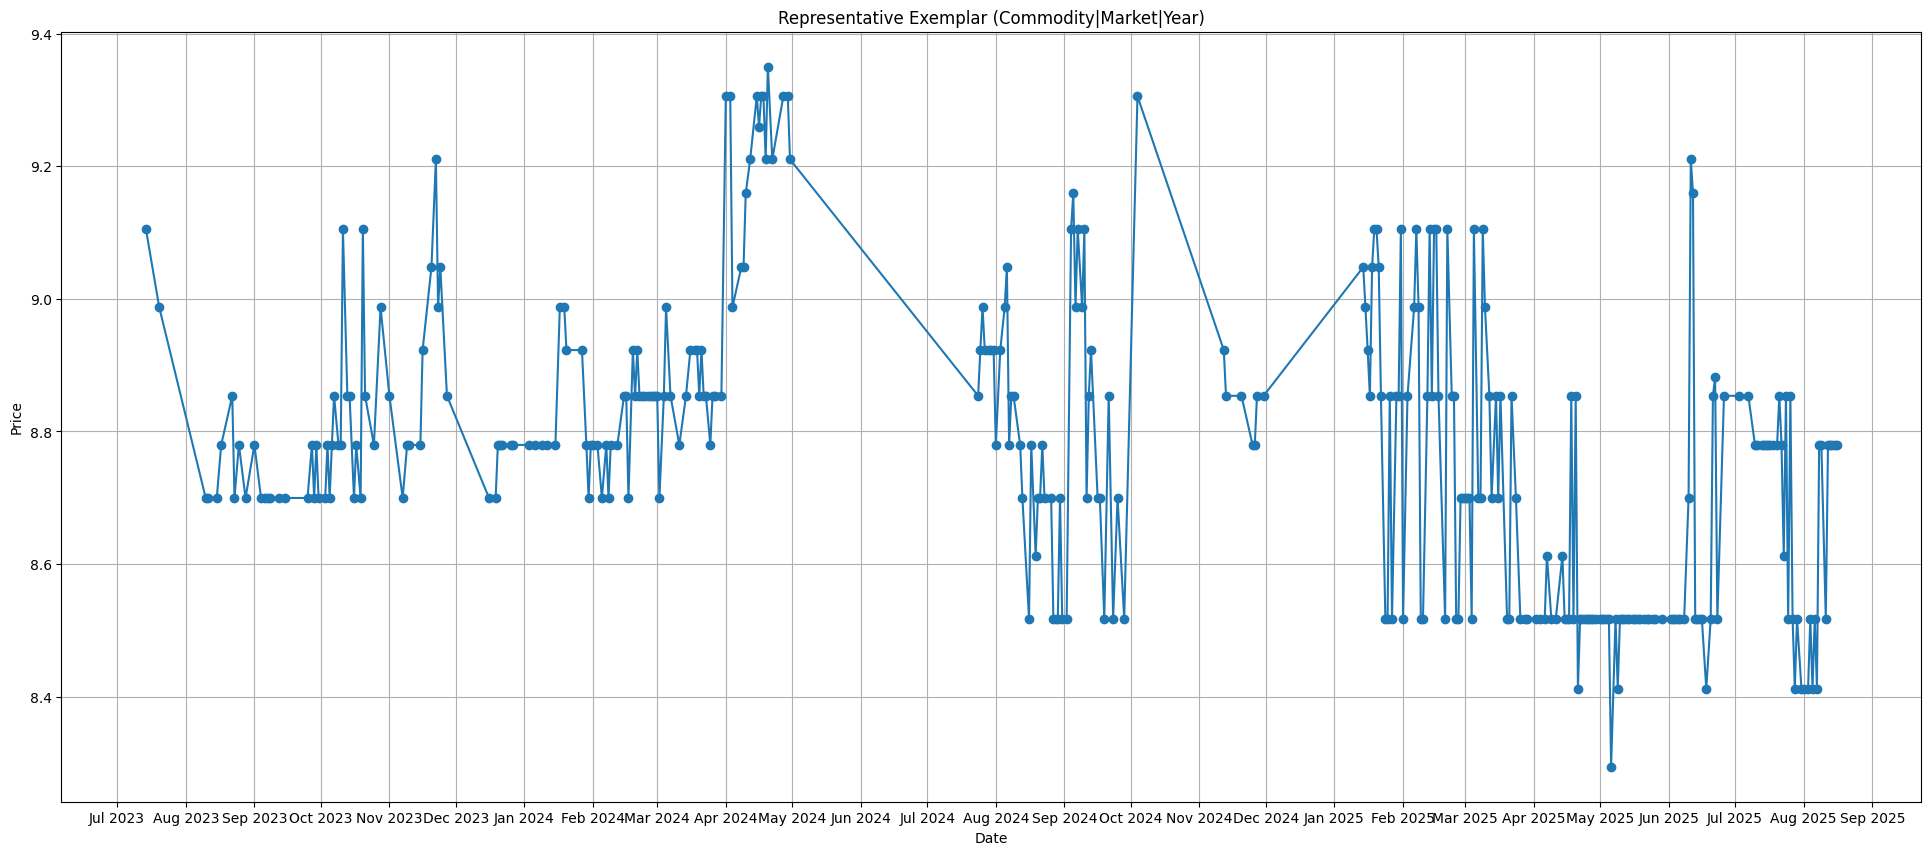

High Volume Product: Indian Beans (Seam)|Other|FAQ
High Volume Market: Thrippunithura


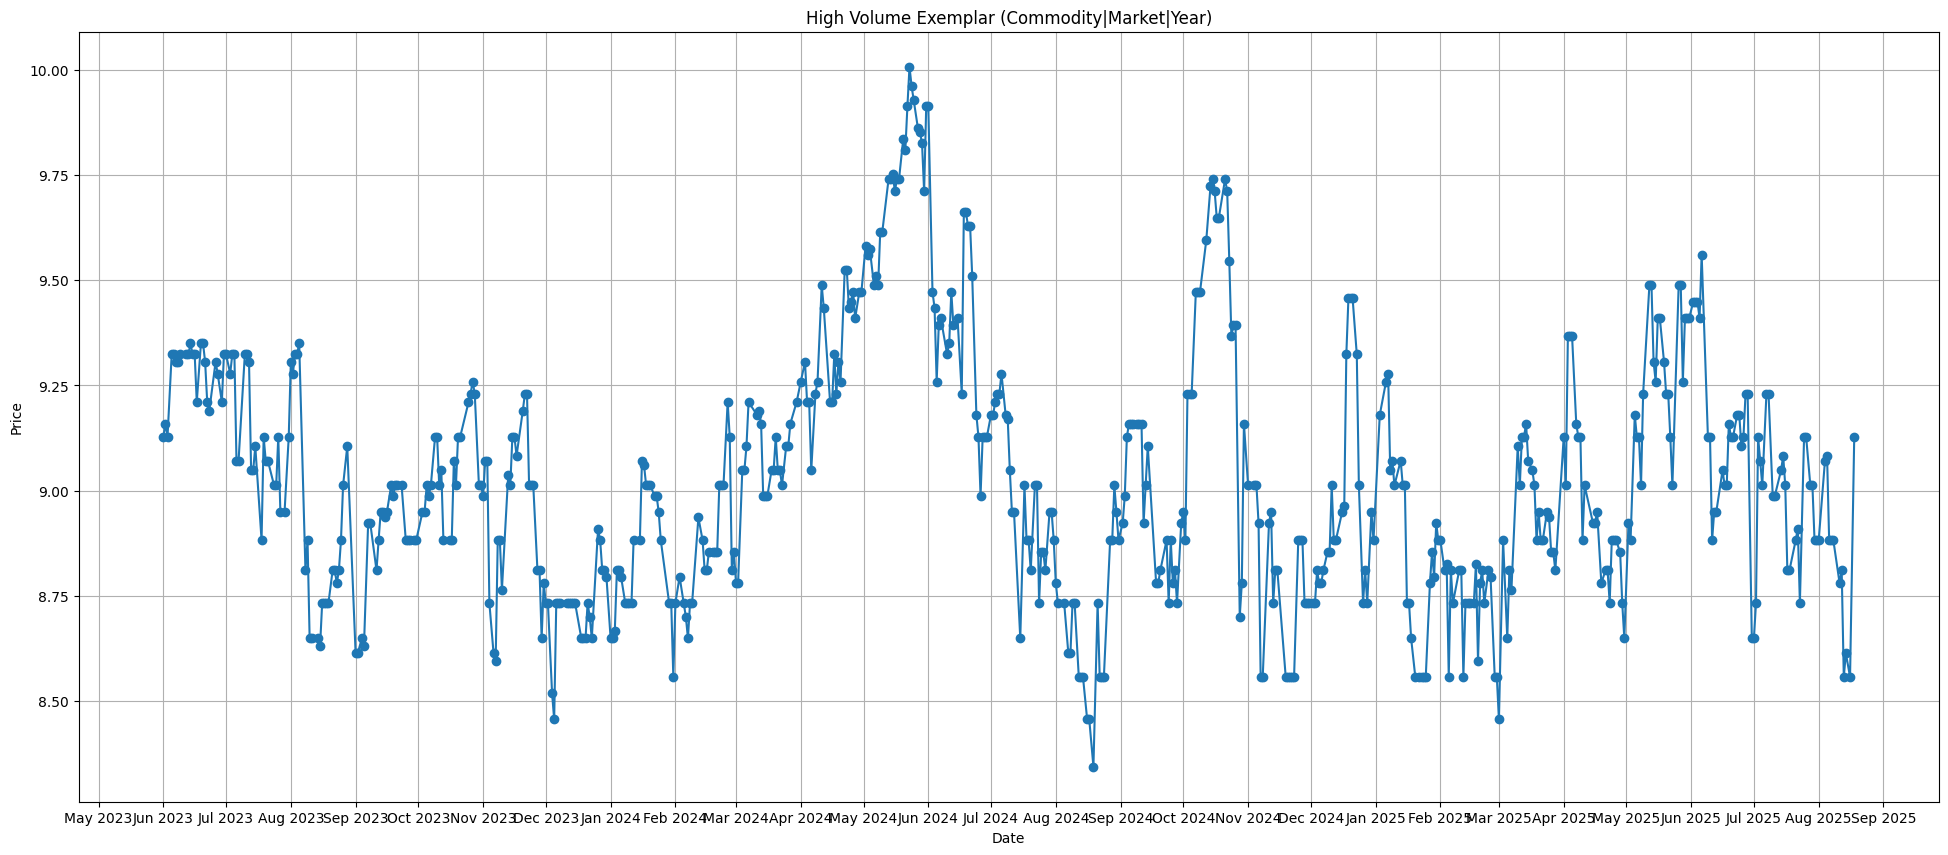

Feature: Commodity|Season
Different exemplars → plotting both
Representative Product: Onion|Big|FAQ
Representative Market: Aluva


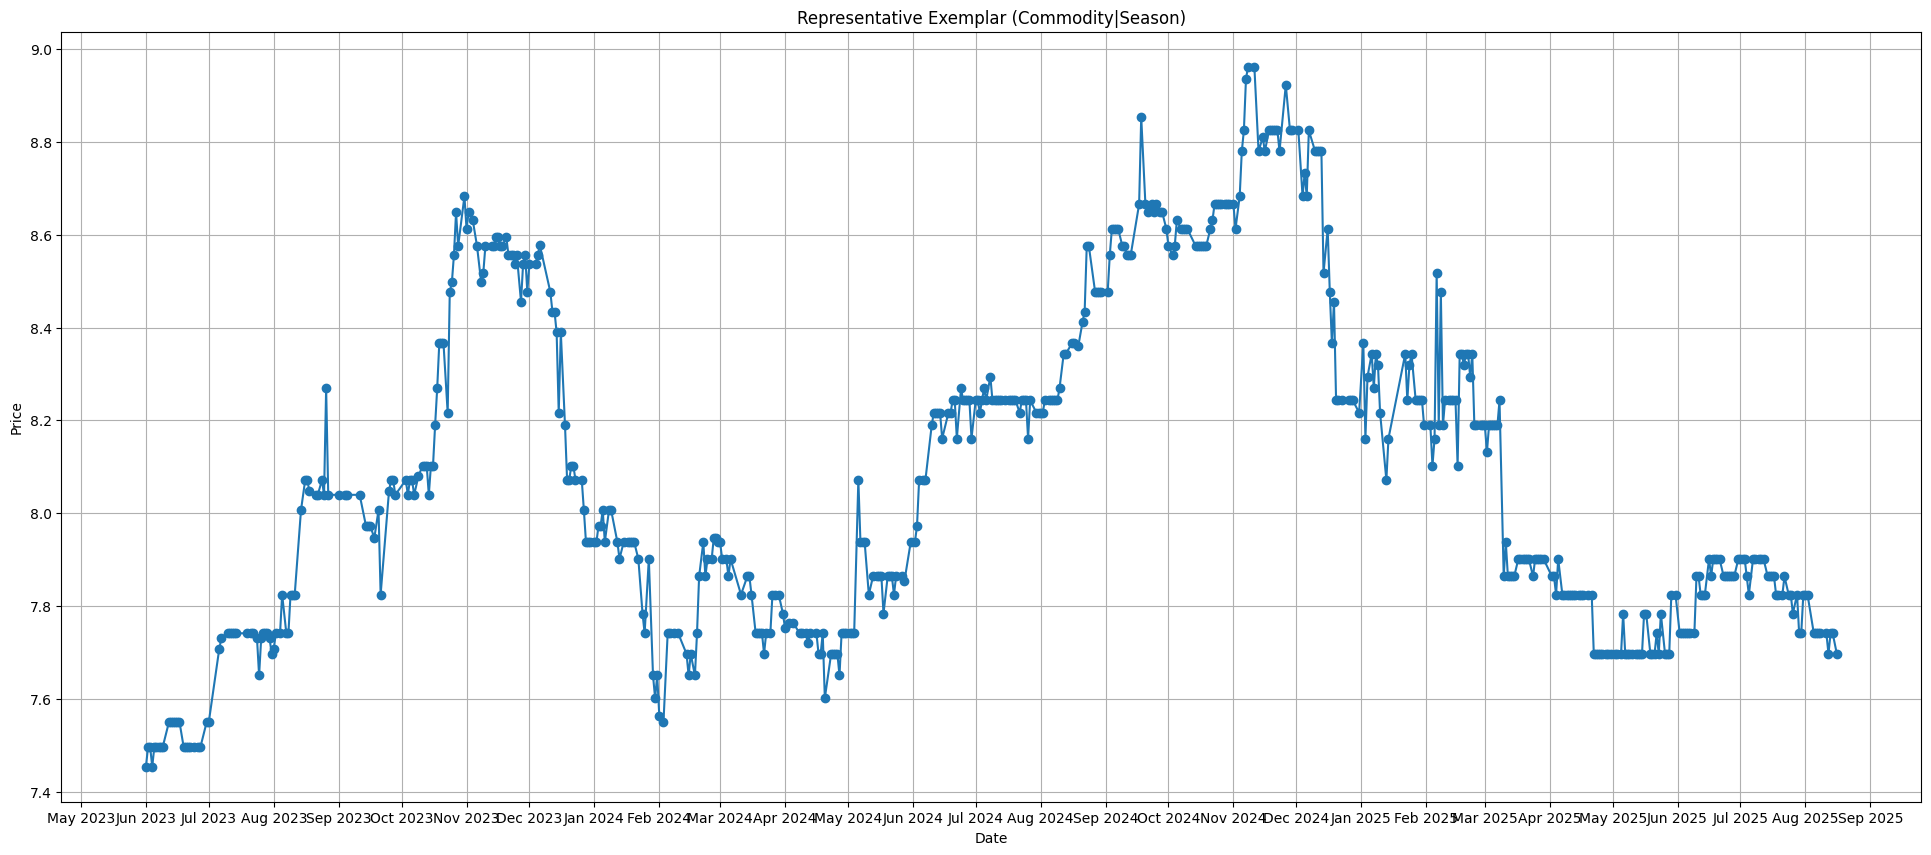

High Volume Product: Onion|Big|FAQ
High Volume Market: Thrippunithura


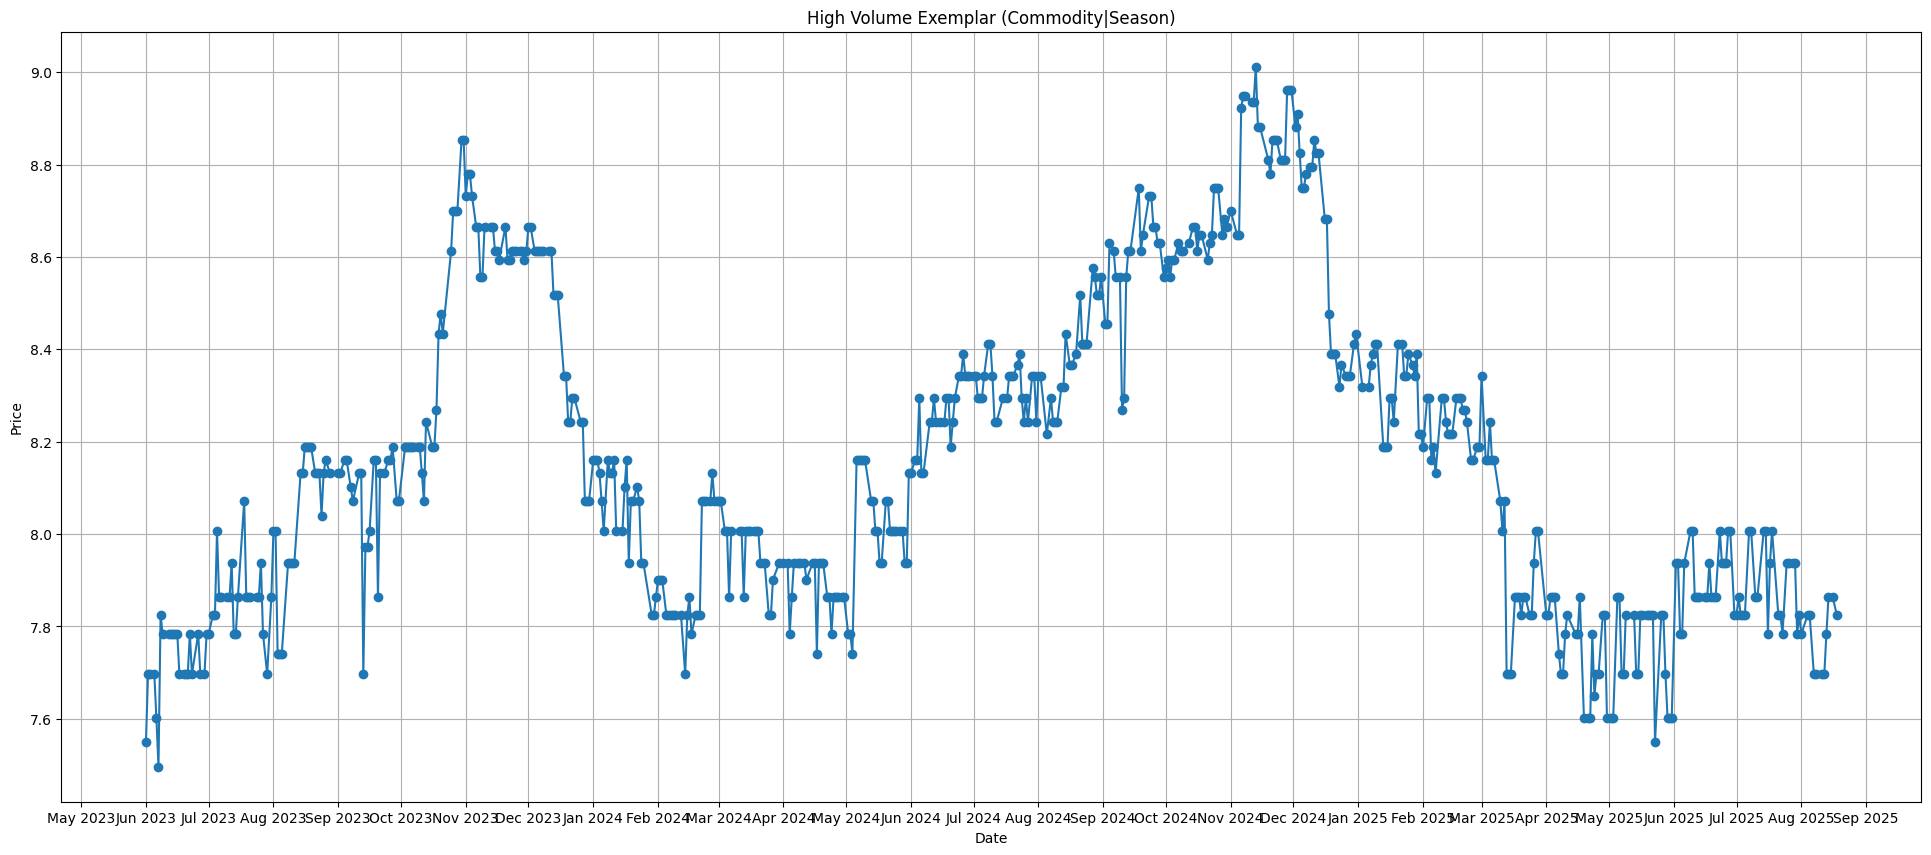

Feature: Commodity|Season|Market
Representative is the same as High Volume exemplar
Product: Cowpea(Veg)|Cowpea (Veg)|FAQ
Market: Aluva


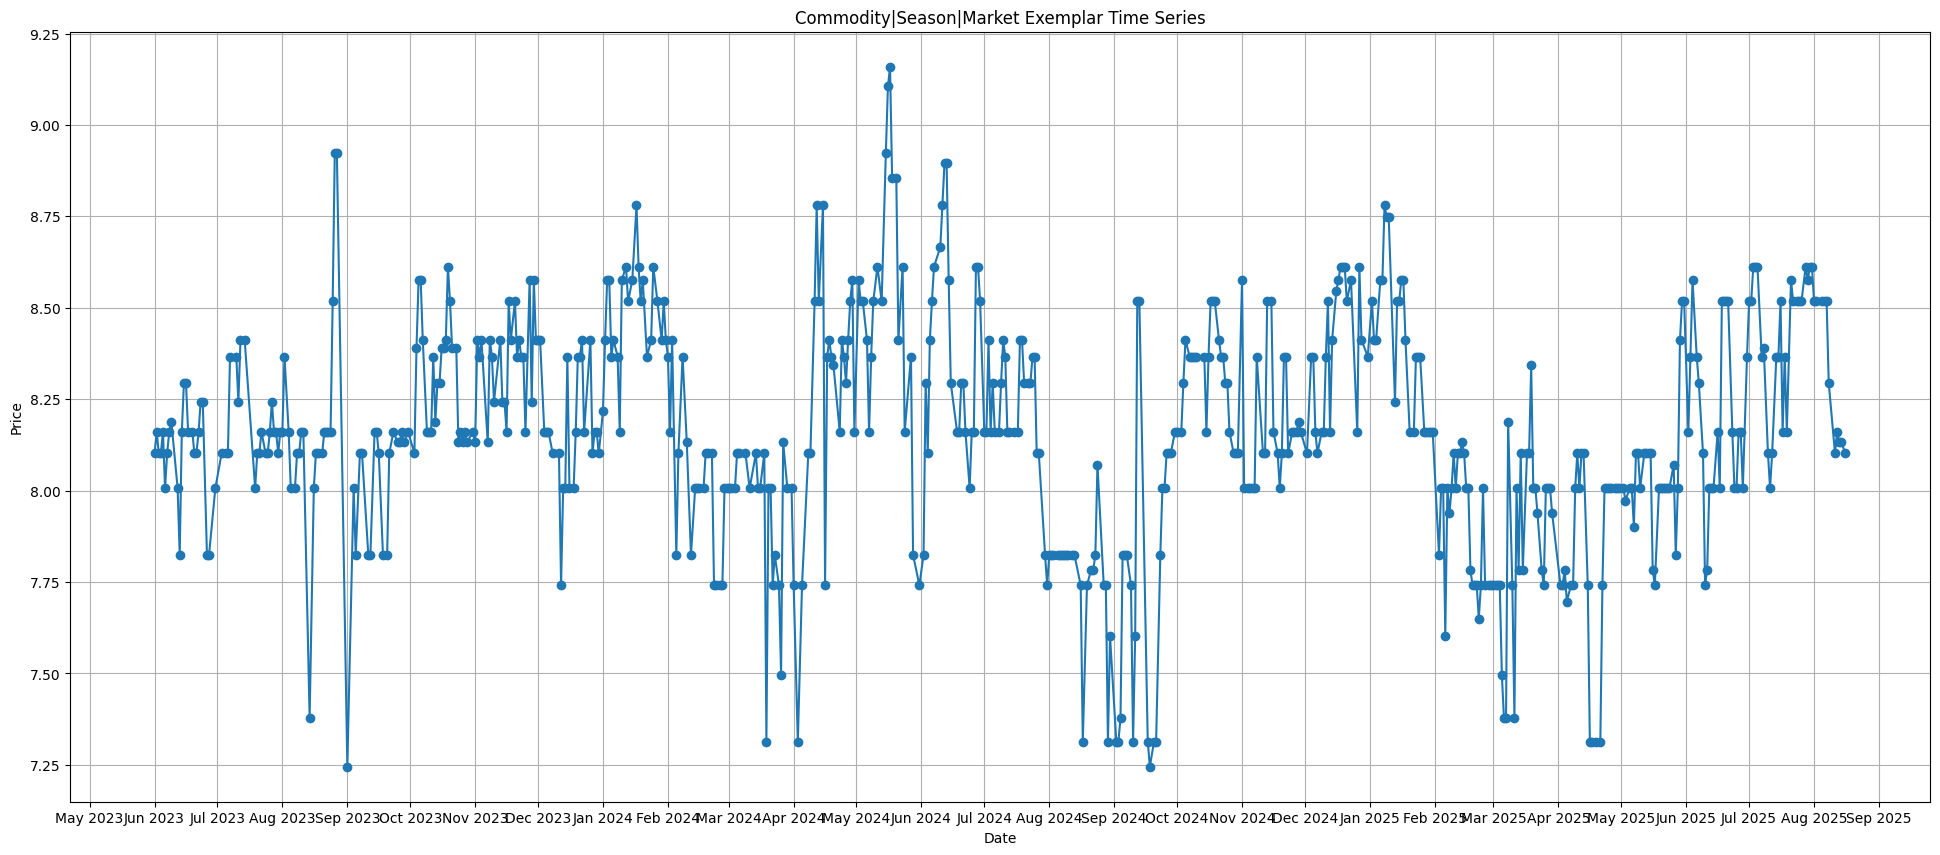

Feature: Commodity|Season|Market|Year
Different exemplars → plotting both
Representative Product: Banana|Poovan|Large
Representative Market: Amalapuram  VFPCK


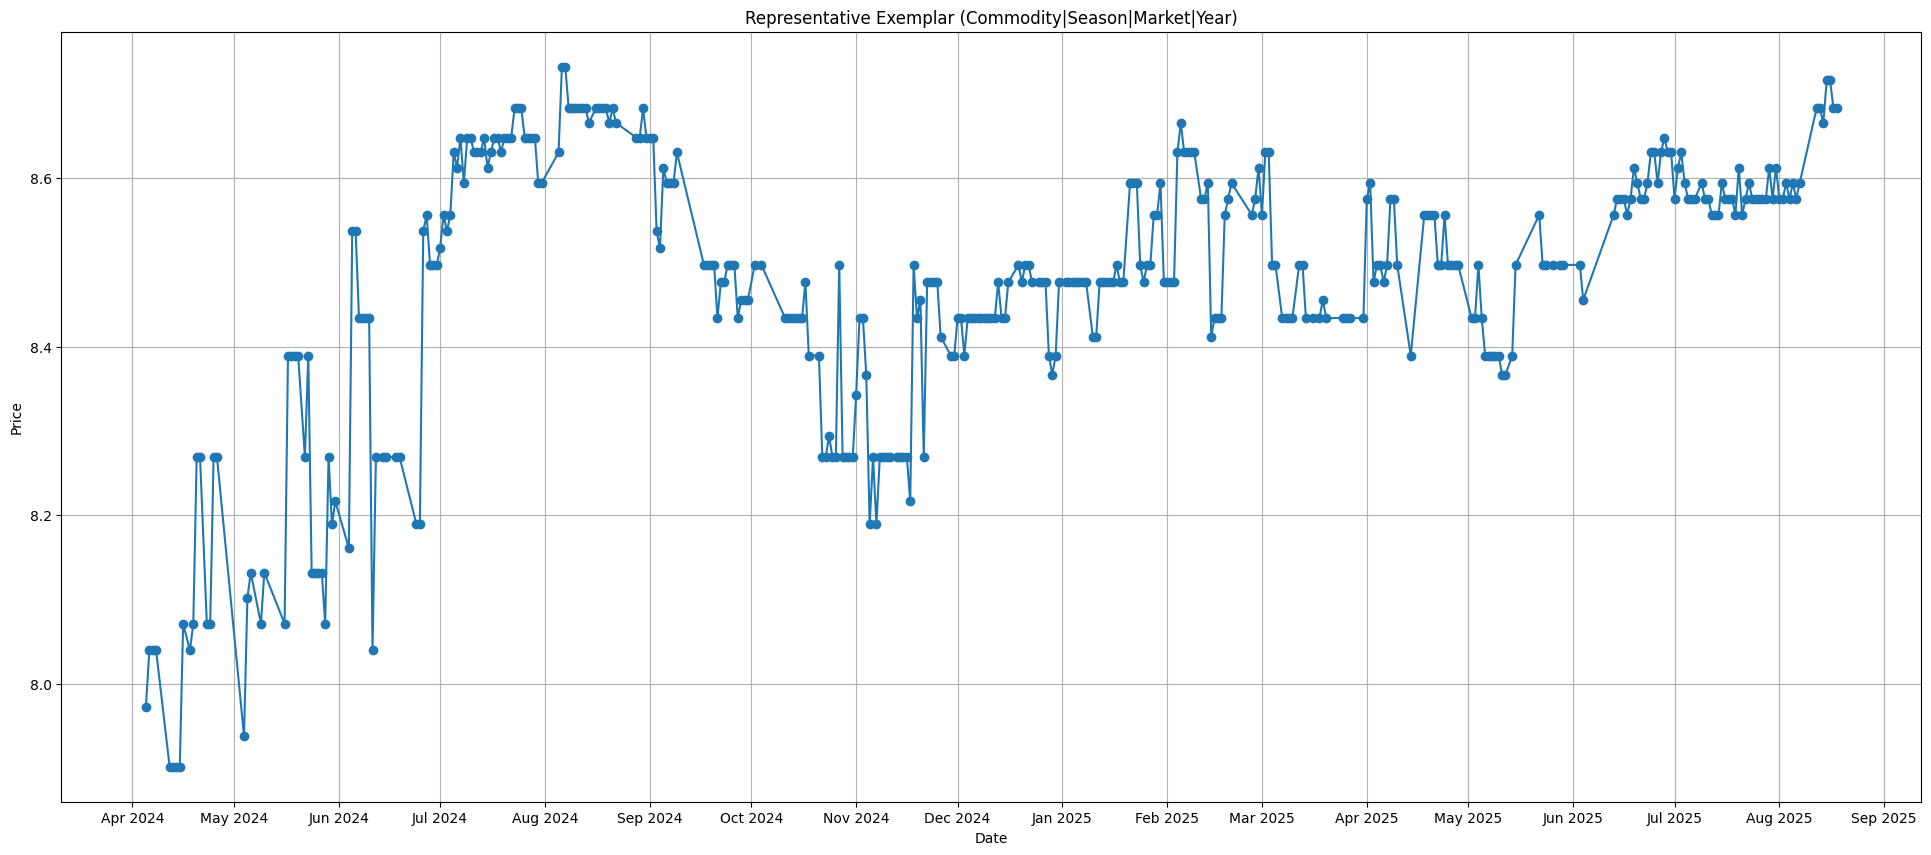

High Volume Product: Potato|Potato|FAQ
High Volume Market: Perumbavoor


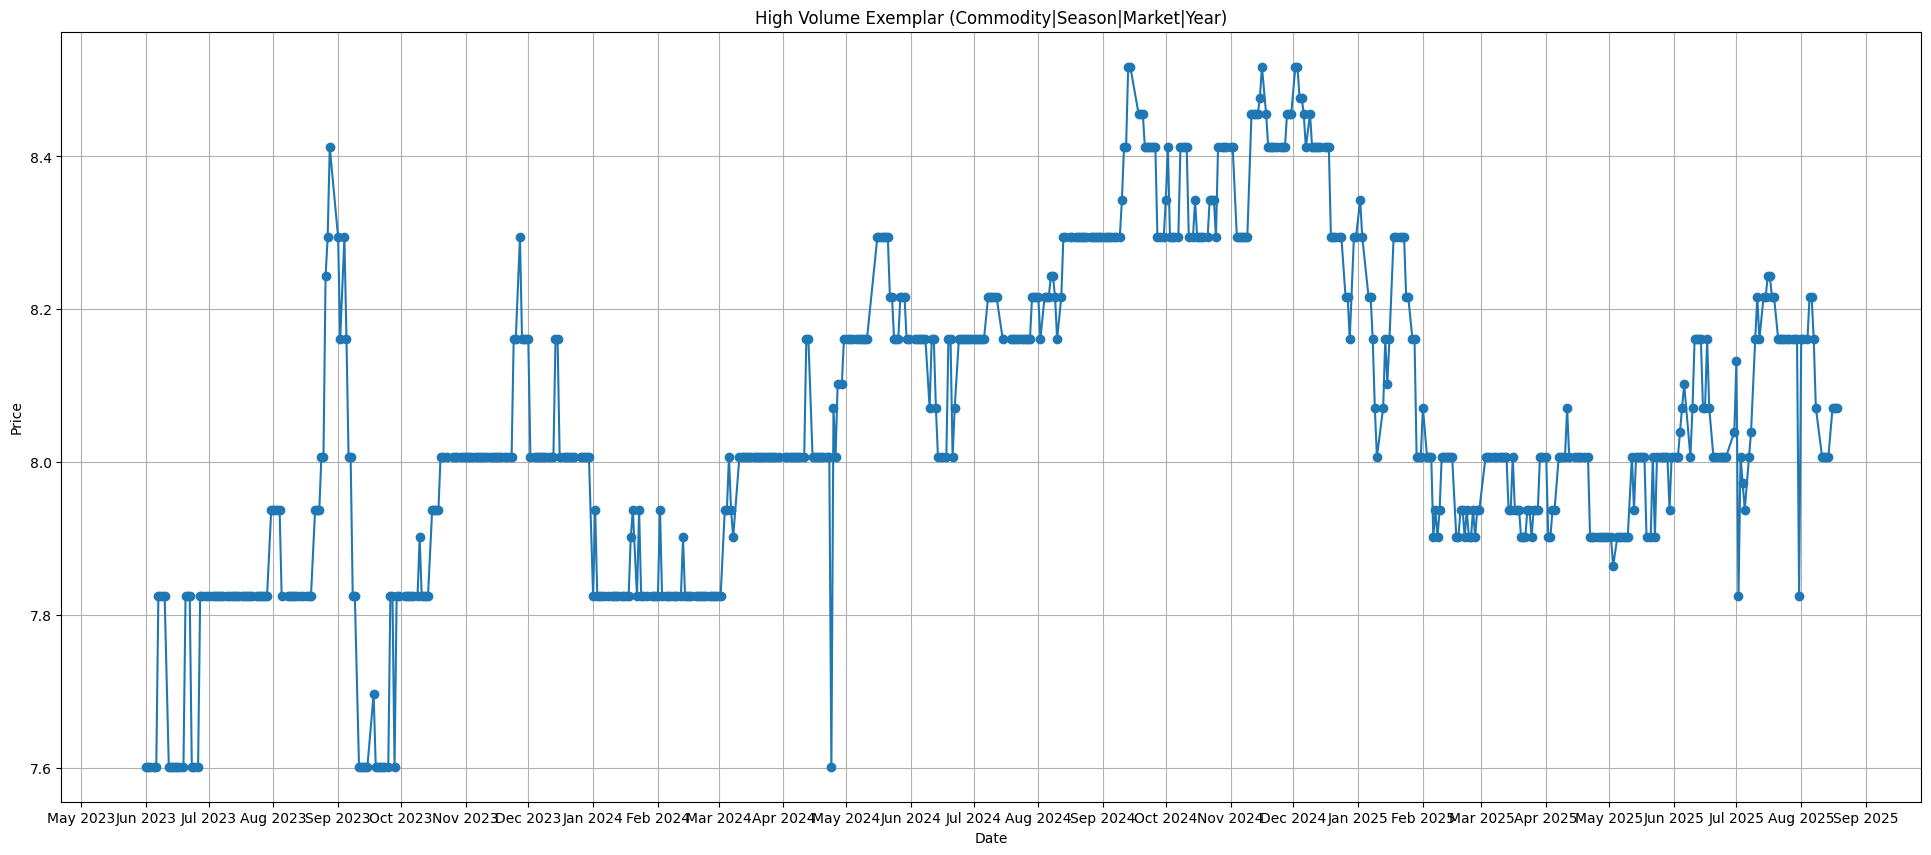

Feature: Commodity|Season|Year
Different exemplars → plotting both
Representative Product: Onion|Other|FAQ
Representative Market: Kothamangalam


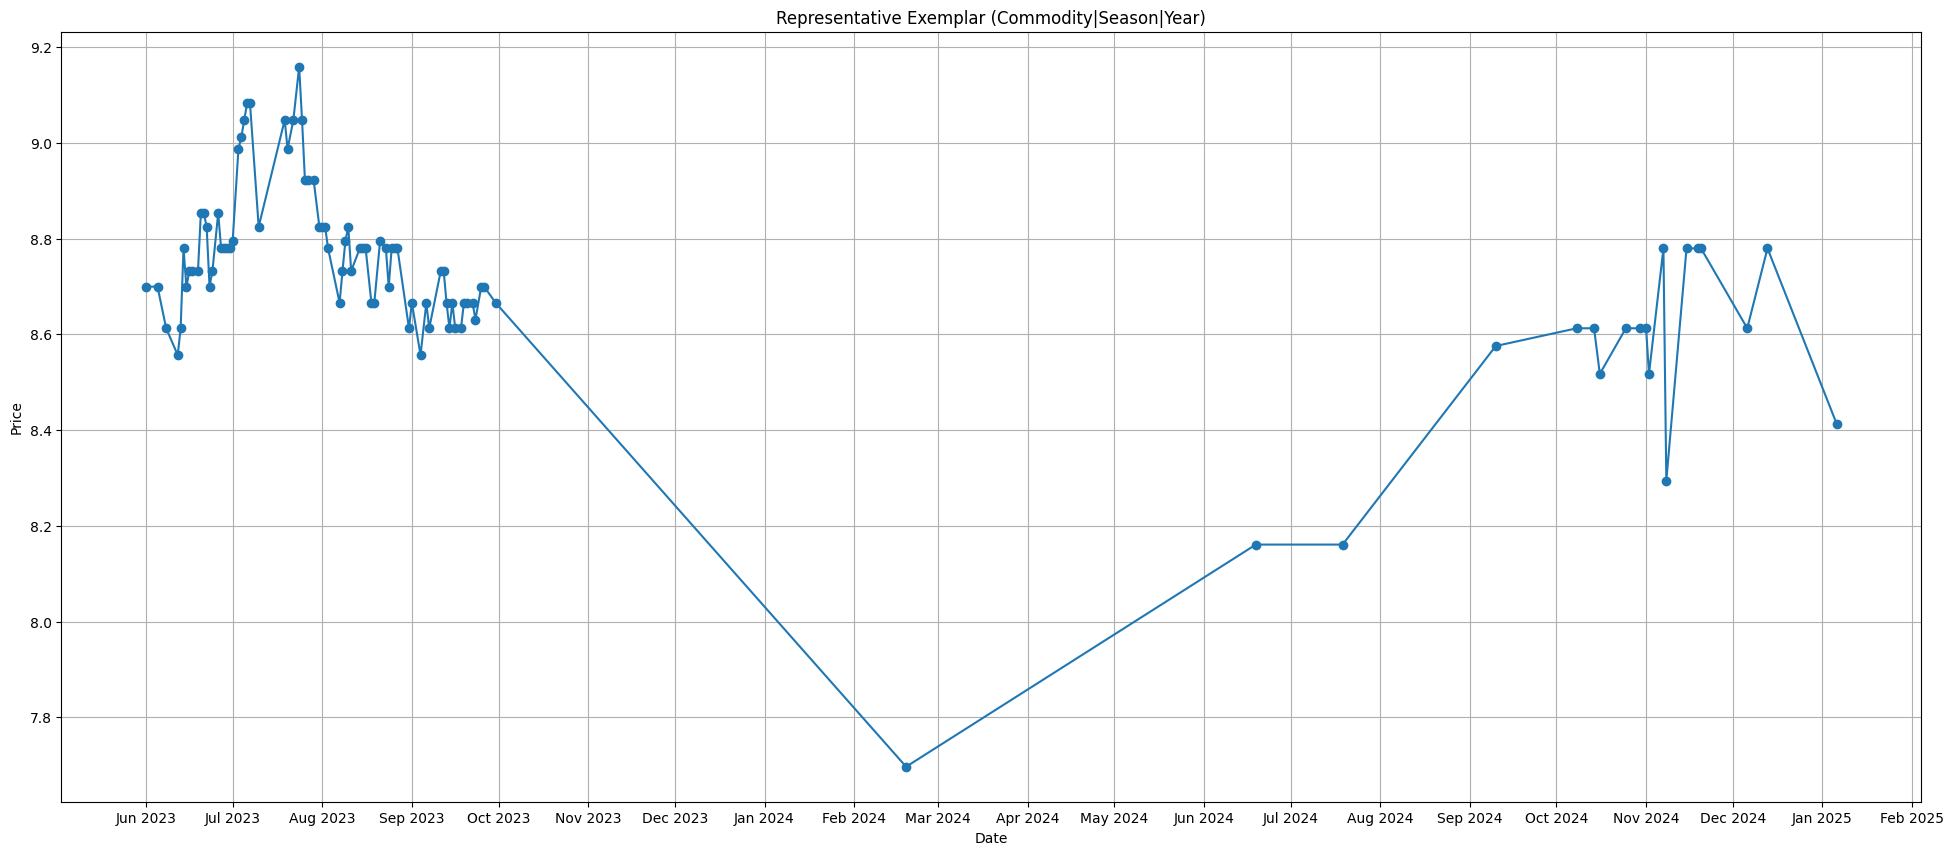

High Volume Product: Onion|Onion|FAQ
High Volume Market: Perumbavoor


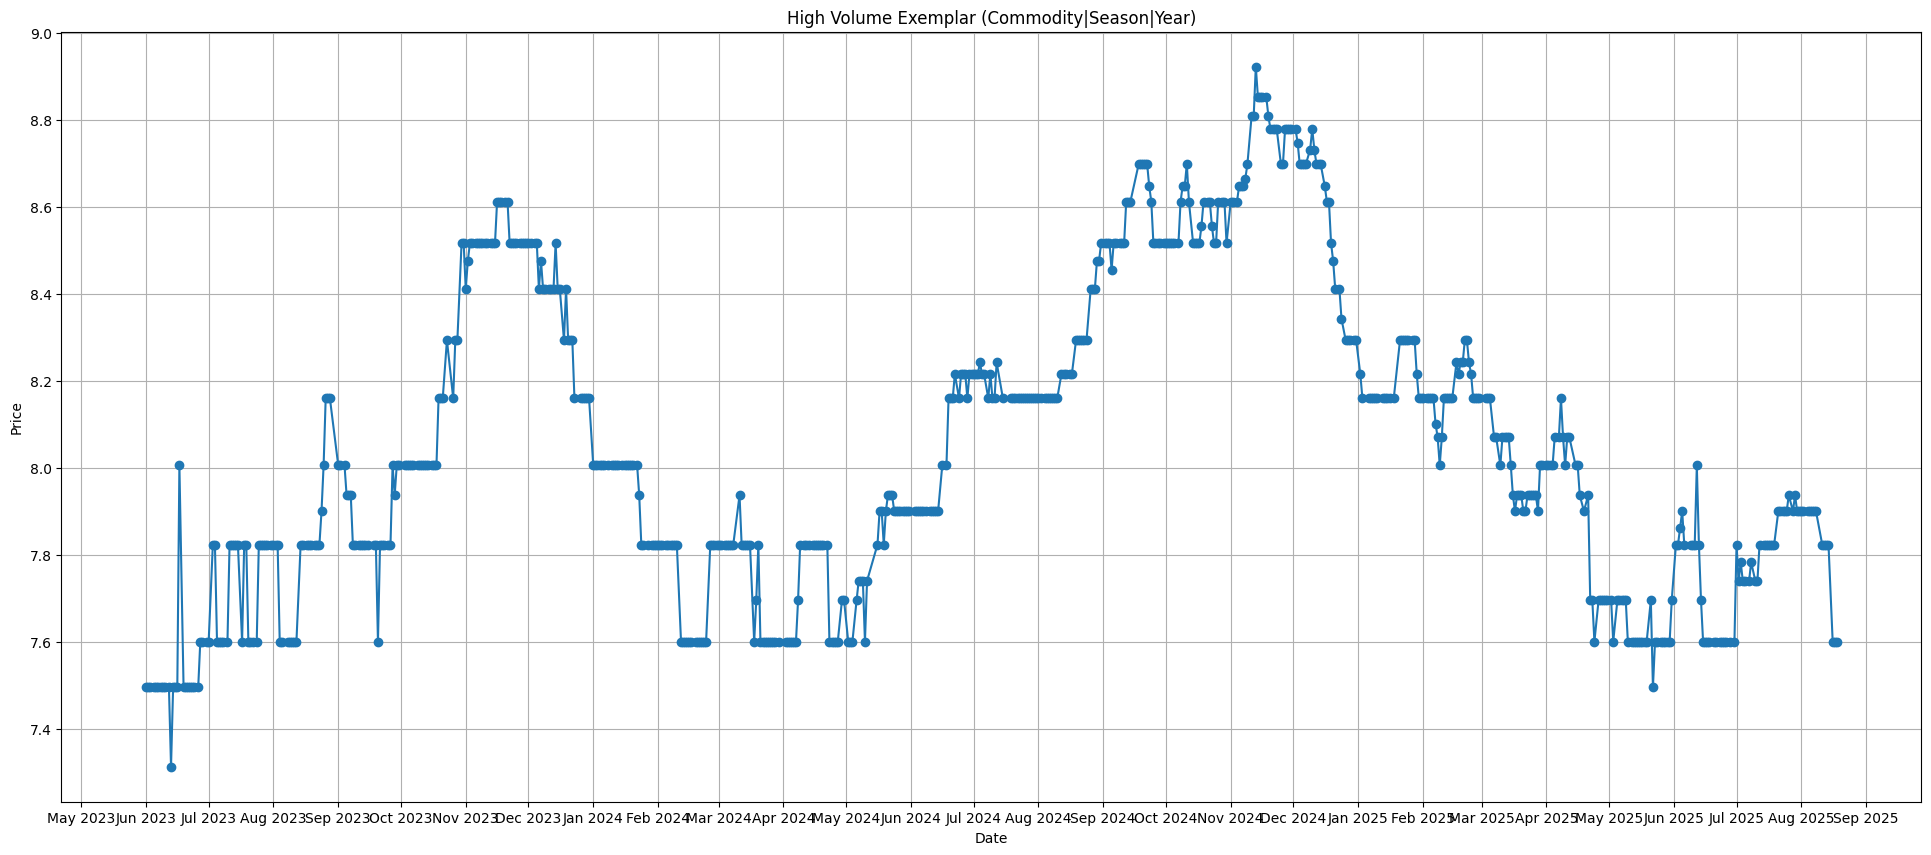

Feature: Commodity|Variety_Type|Market|Year
Different exemplars → plotting both
Representative Product: Pineapple|Other|Medium
Representative Market: Broadway market


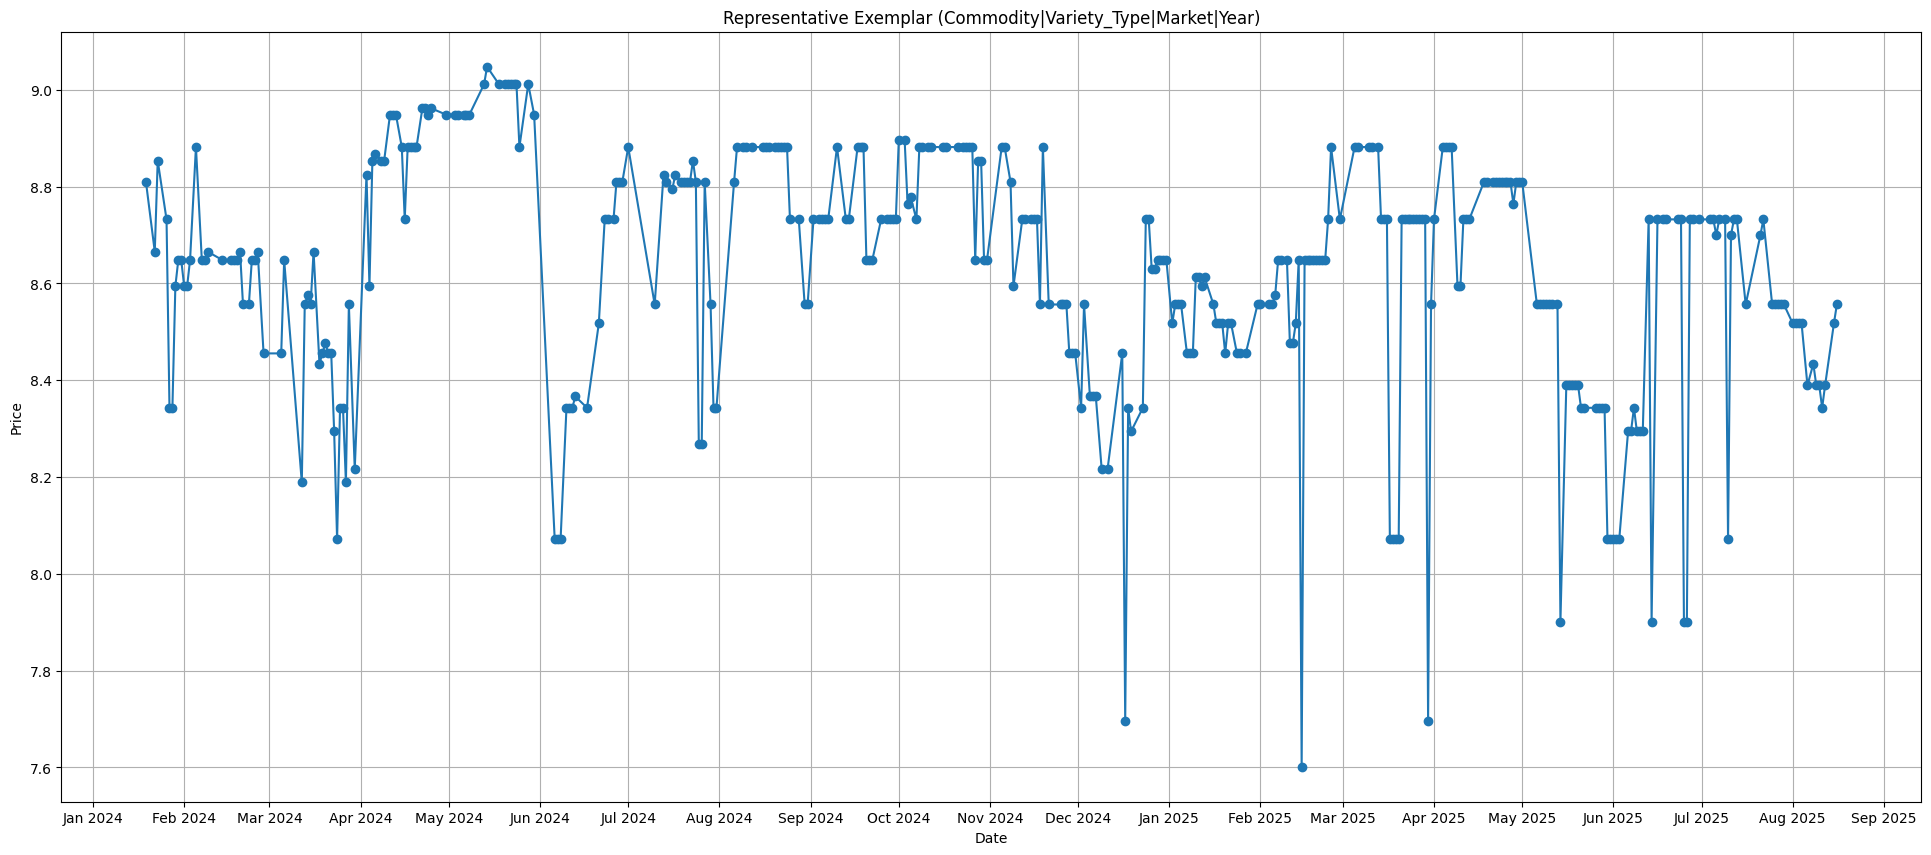

High Volume Product: Pineapple|Other|Medium
High Volume Market: Keezhampara VFPCK


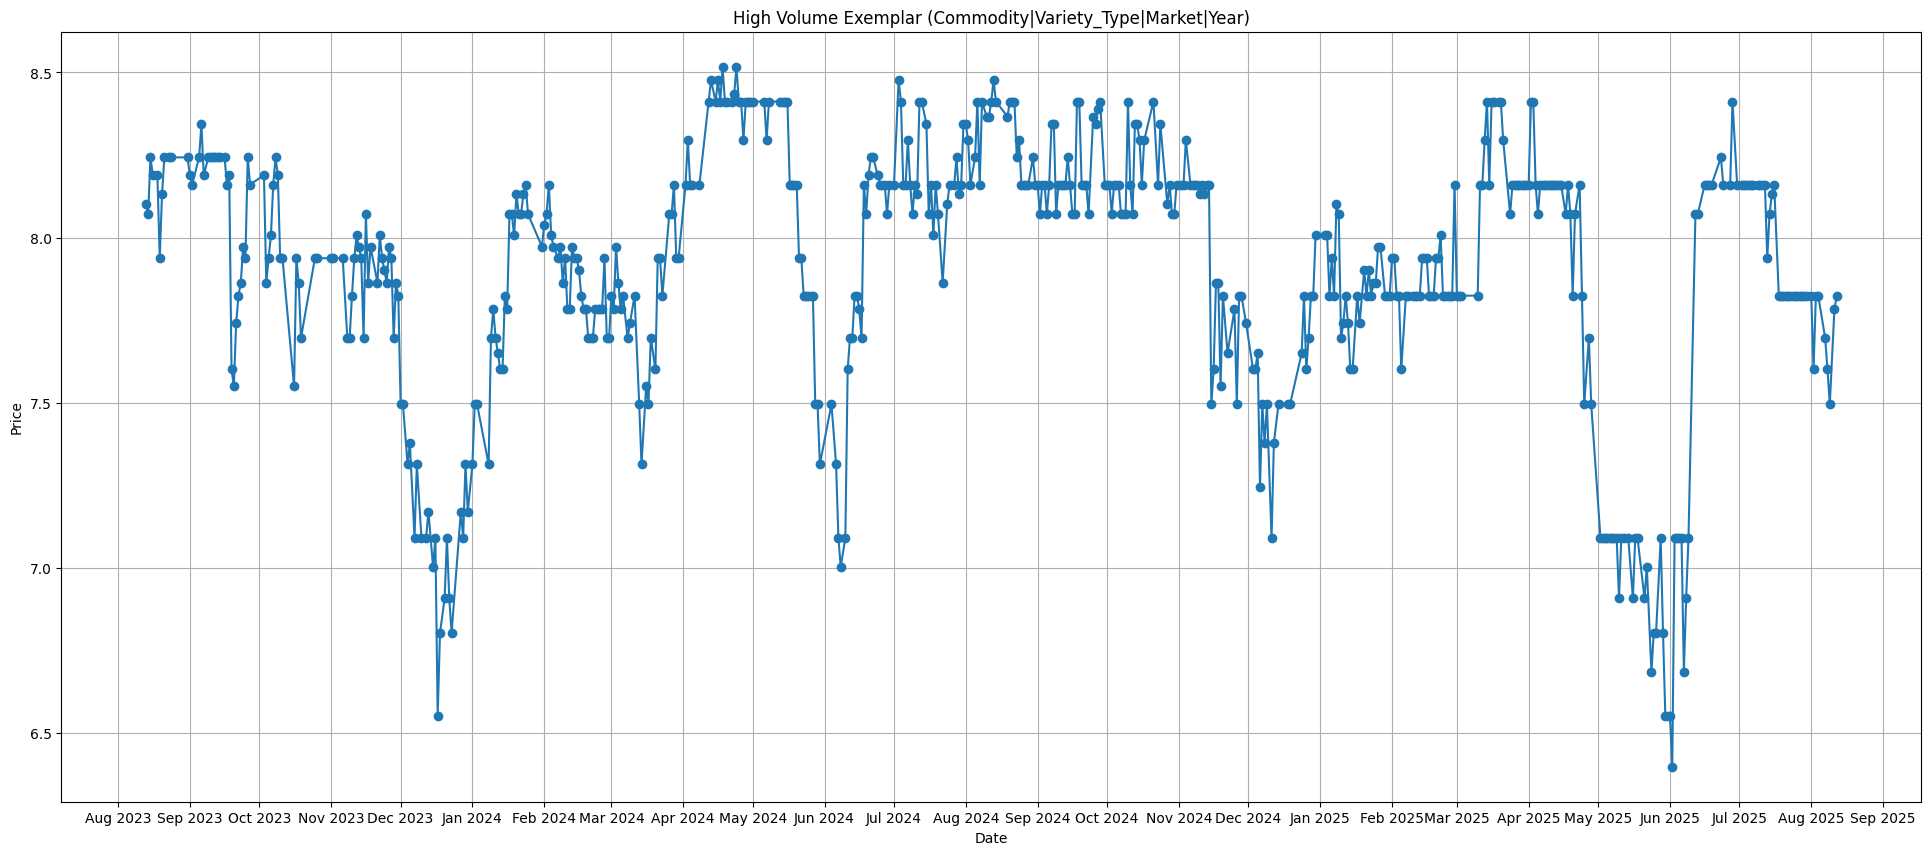

Feature: Commodity|Variety_Type|Season|Market
Different exemplars → plotting both
Representative Product: Banana|Palayamthodan|Large
Representative Market: Amalapuram  VFPCK


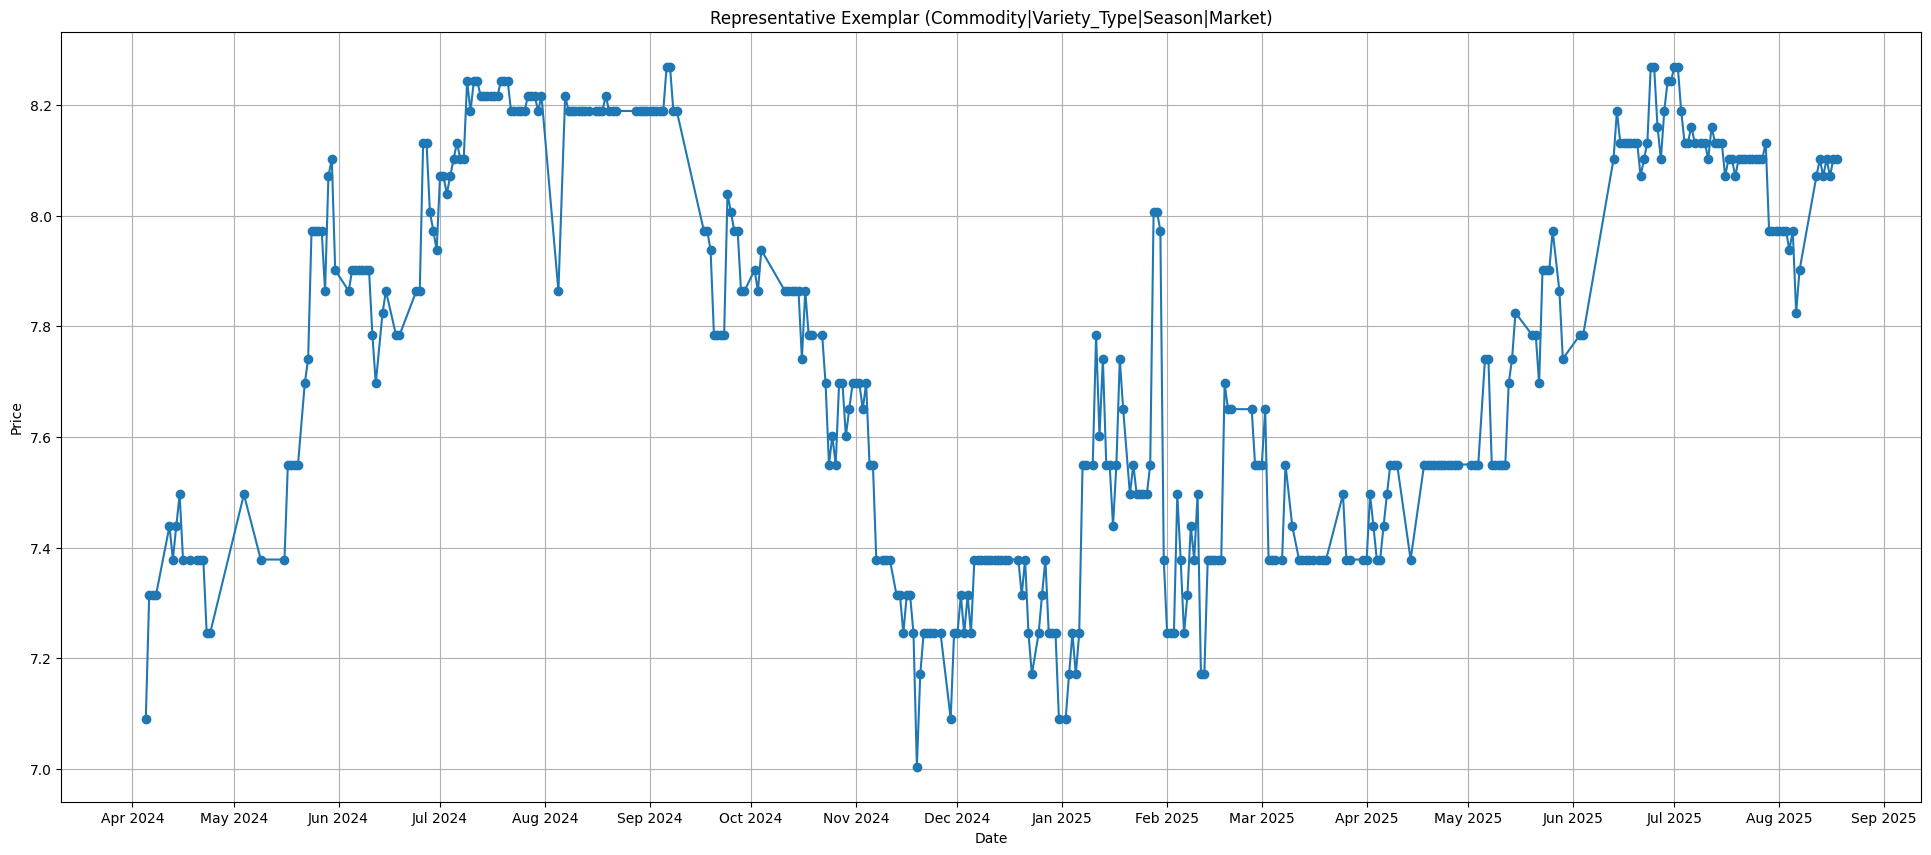

High Volume Product: Banana|Palayamthodan|Medium
High Volume Market: Perumbavoor


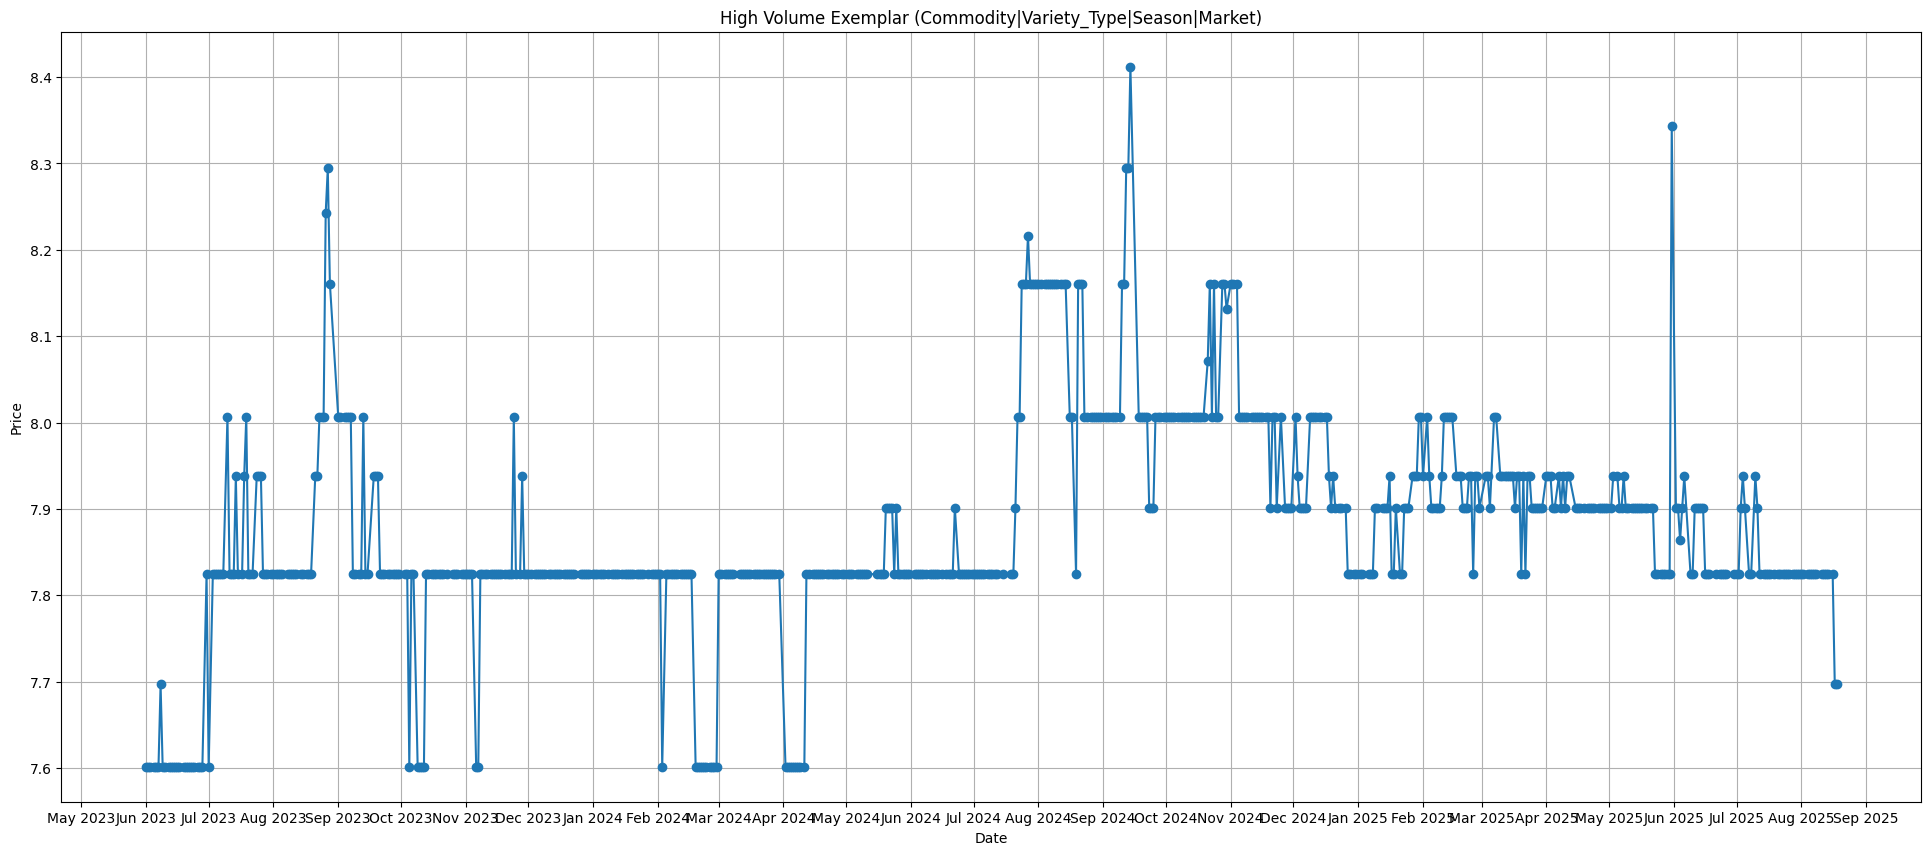

Feature: Commodity|Variety_Type|Season|Market|Year
Representative is the same as High Volume exemplar
Product: Pineapple|Other|Large
Market: Keezhampara VFPCK


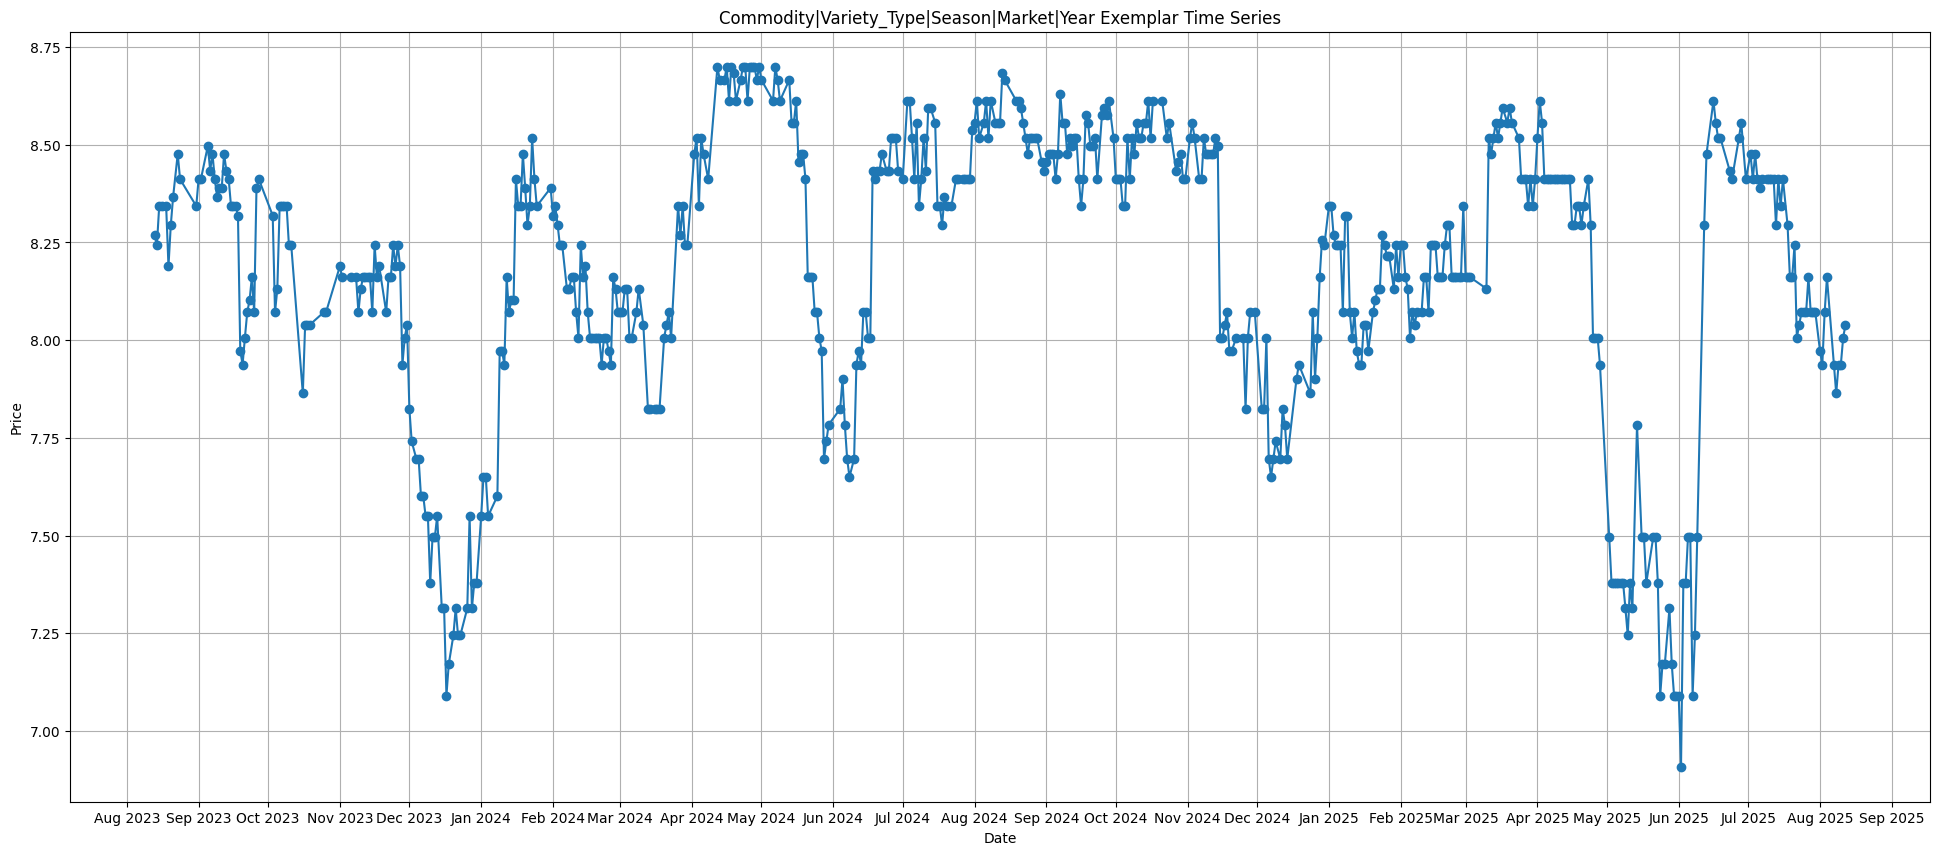

Feature: Commodity|Variety_Type|Season|Year
Different exemplars → plotting both
Representative Product: Potato|(Red Nanital)|FAQ
Representative Market: North Paravur


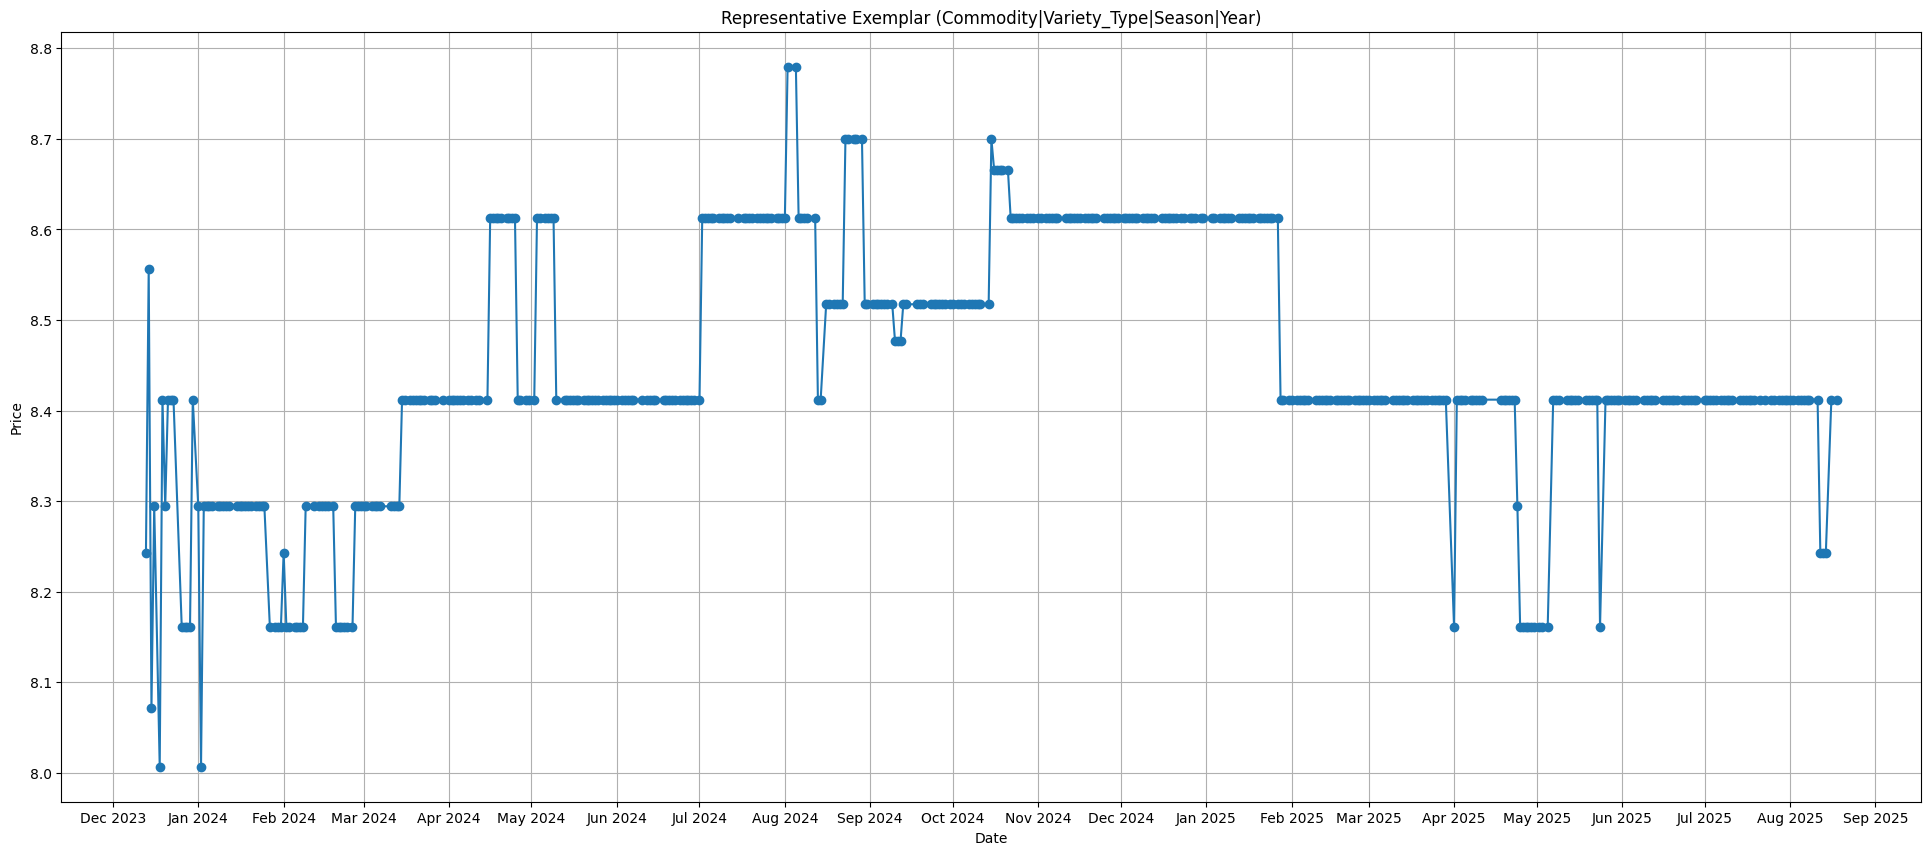

High Volume Product: Pineapple|Other|Small
High Volume Market: Keezhampara VFPCK


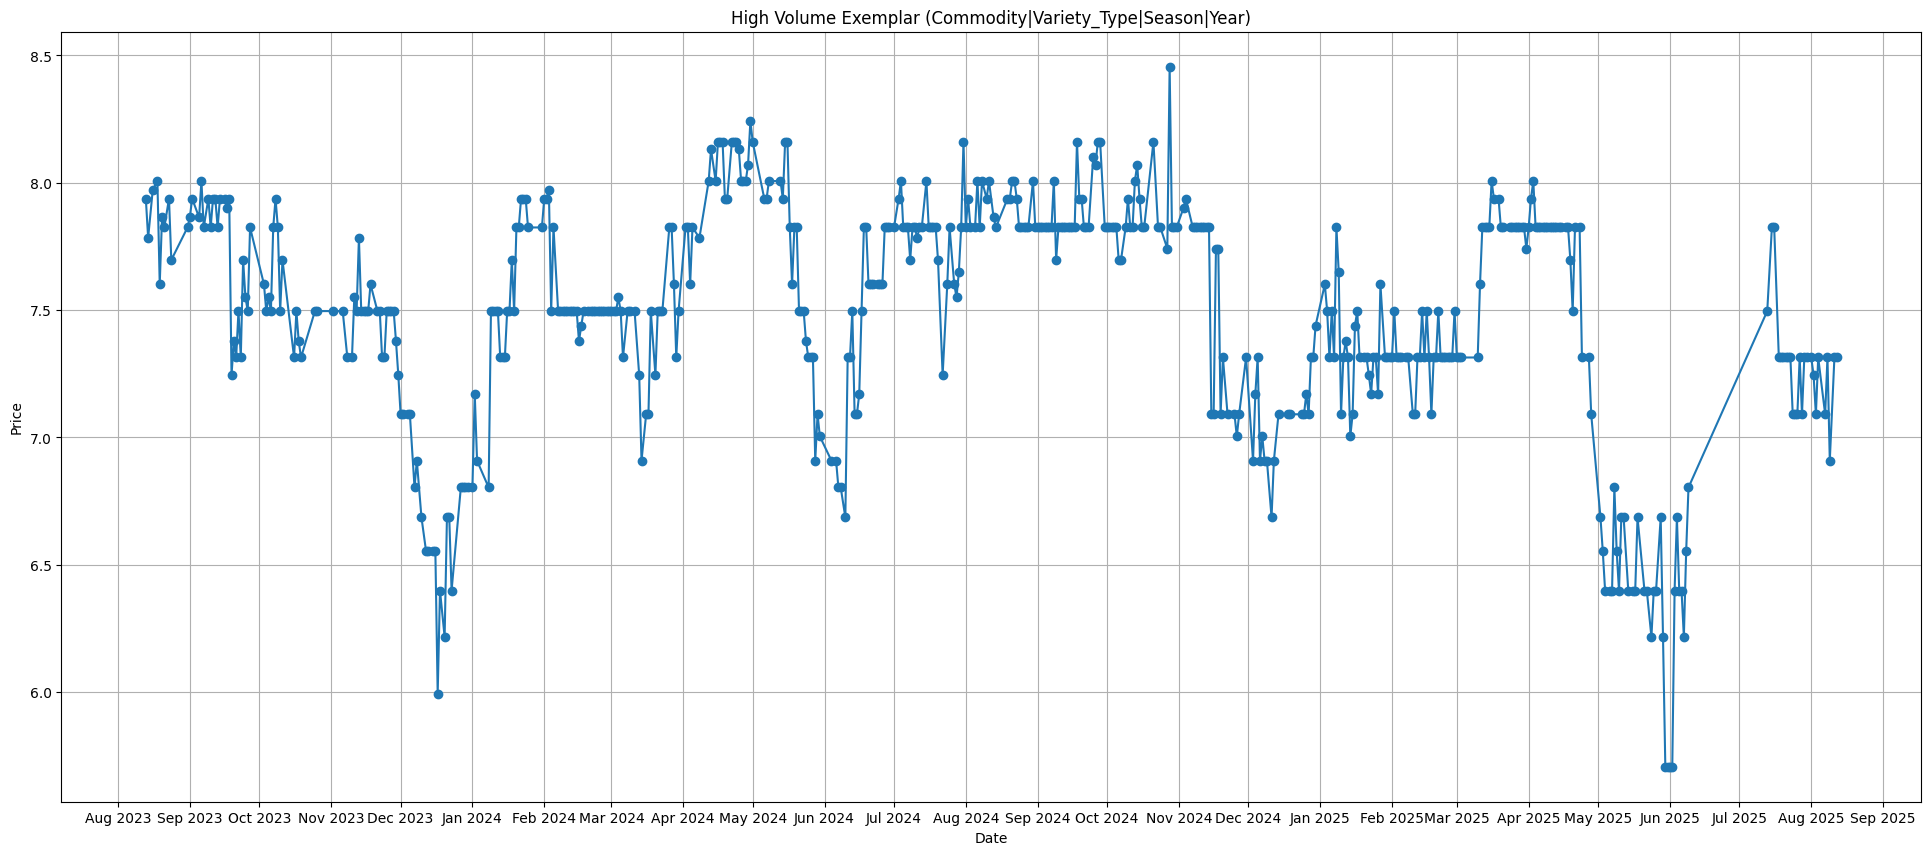

Feature: Commodity|Year
Representative is the same as High Volume exemplar
Product: Field Pea|Other|FAQ
Market: Kothamangalam


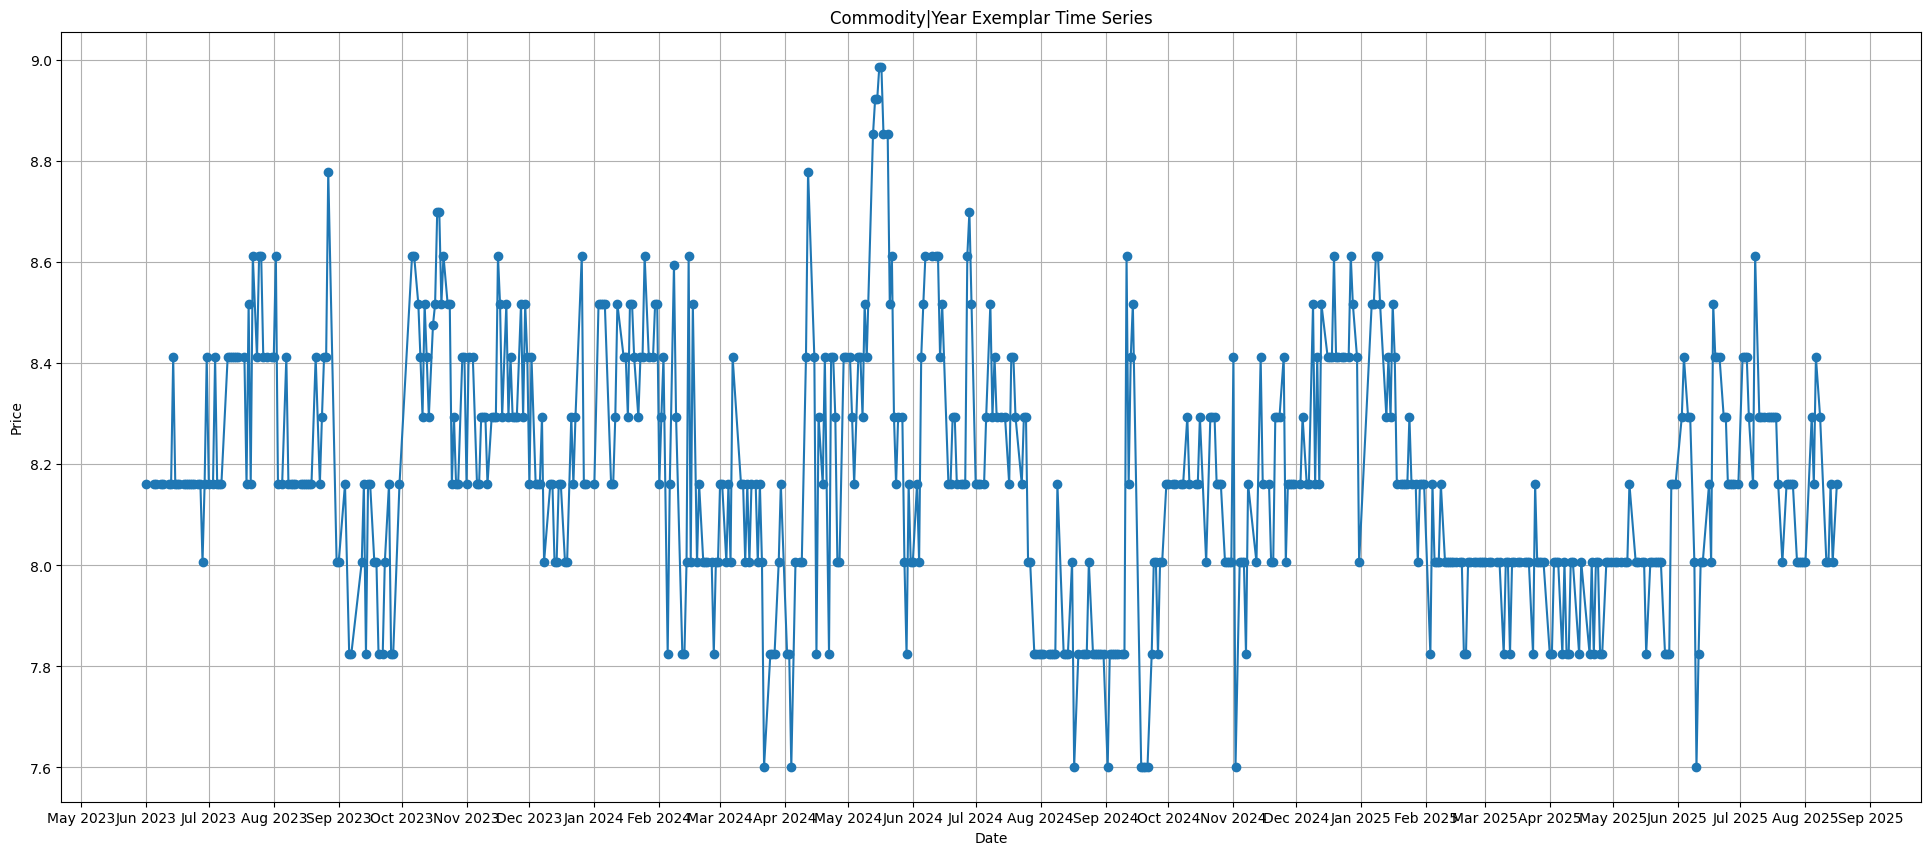

Feature: Market|Year
Different exemplars → plotting both
Representative Product: Beetroot|Beetroot|FAQ
Representative Market: Angamaly


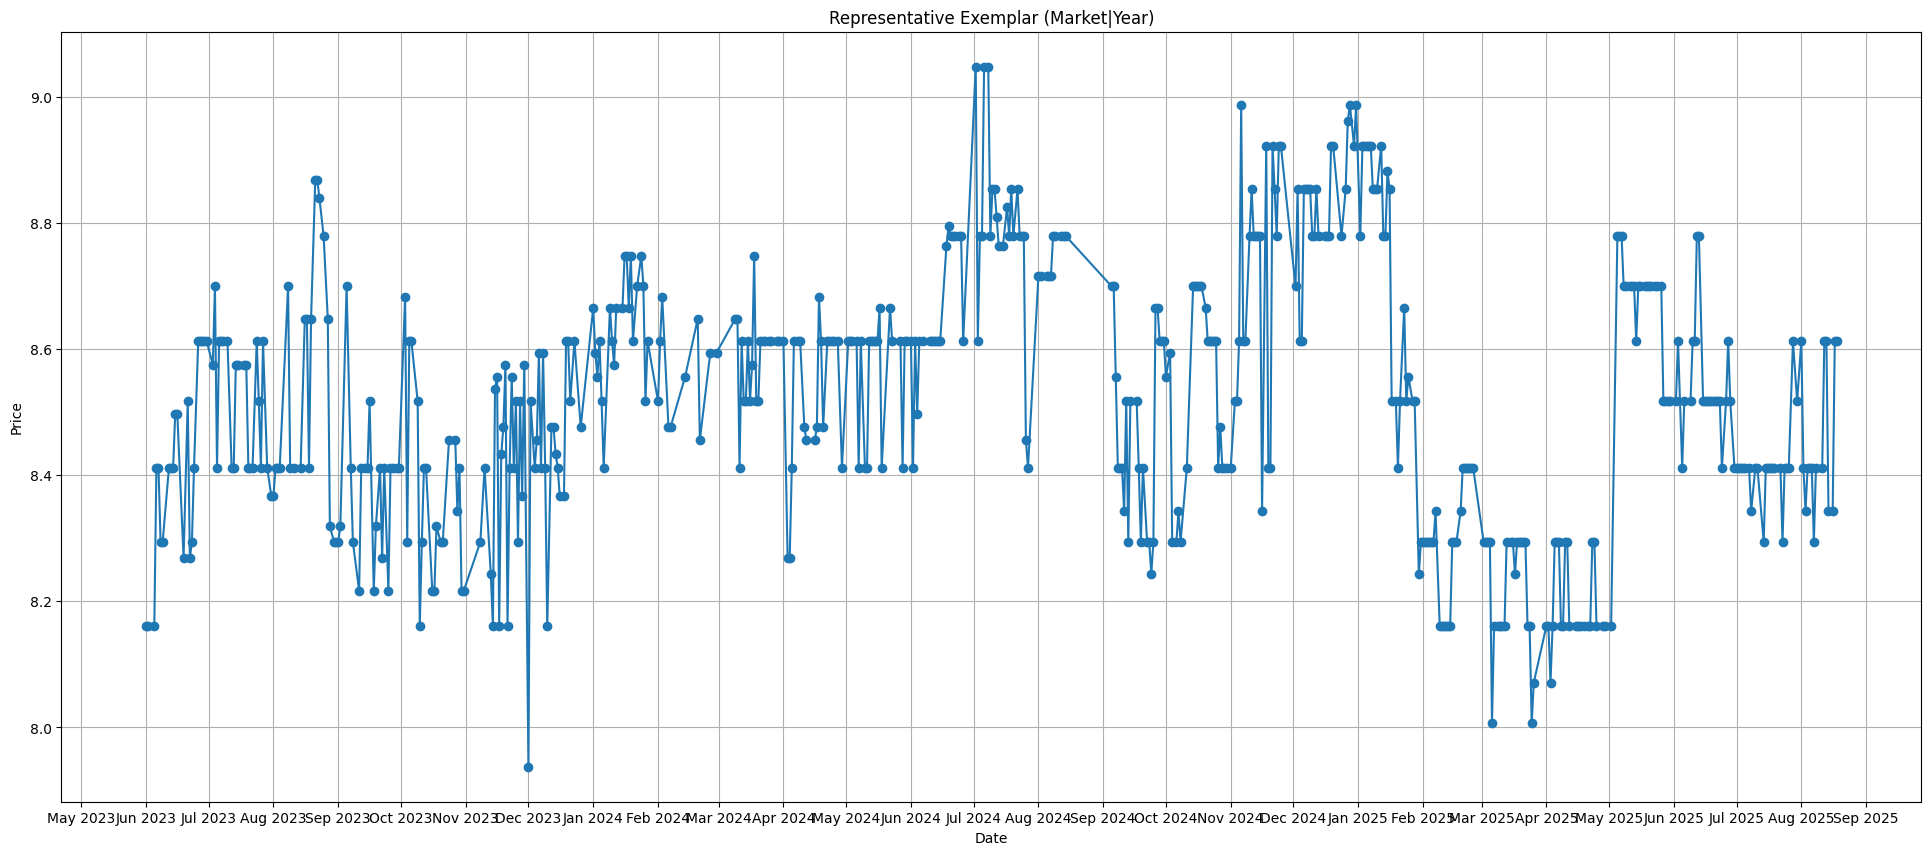

High Volume Product: Cabbage|Cabbage|FAQ
High Volume Market: Perumbavoor


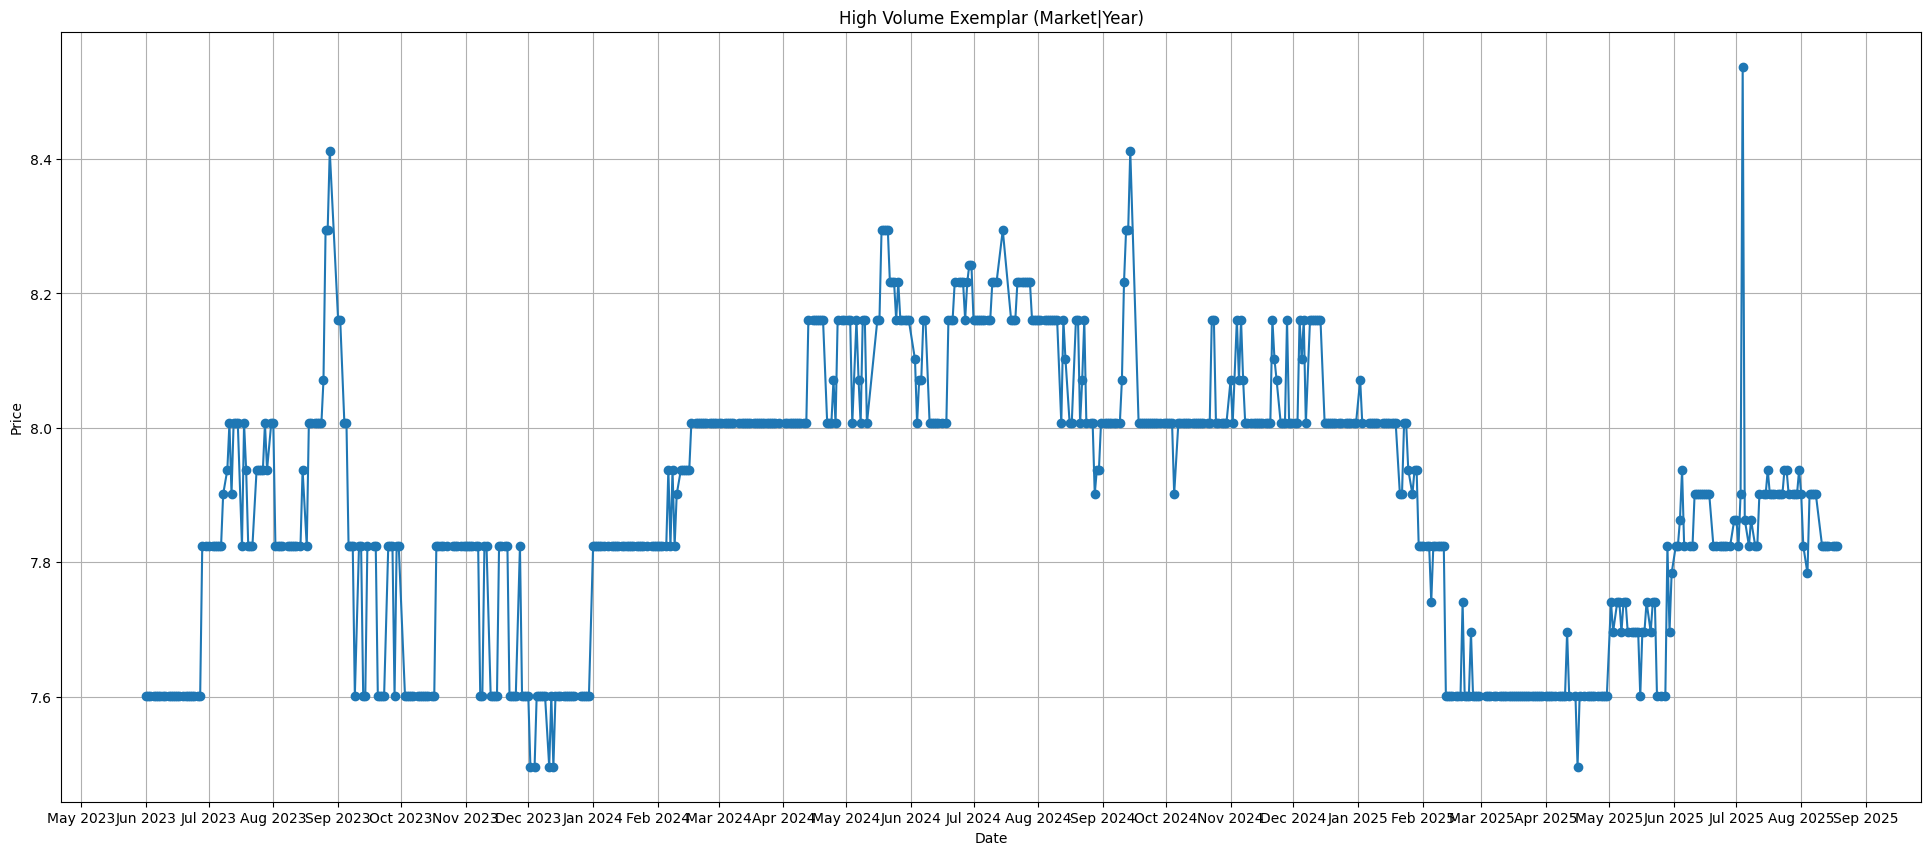

Feature: Season
Different exemplars → plotting both
Representative Product: Mango (Raw-Ripe)|Other|FAQ
Representative Market: Kothamangalam


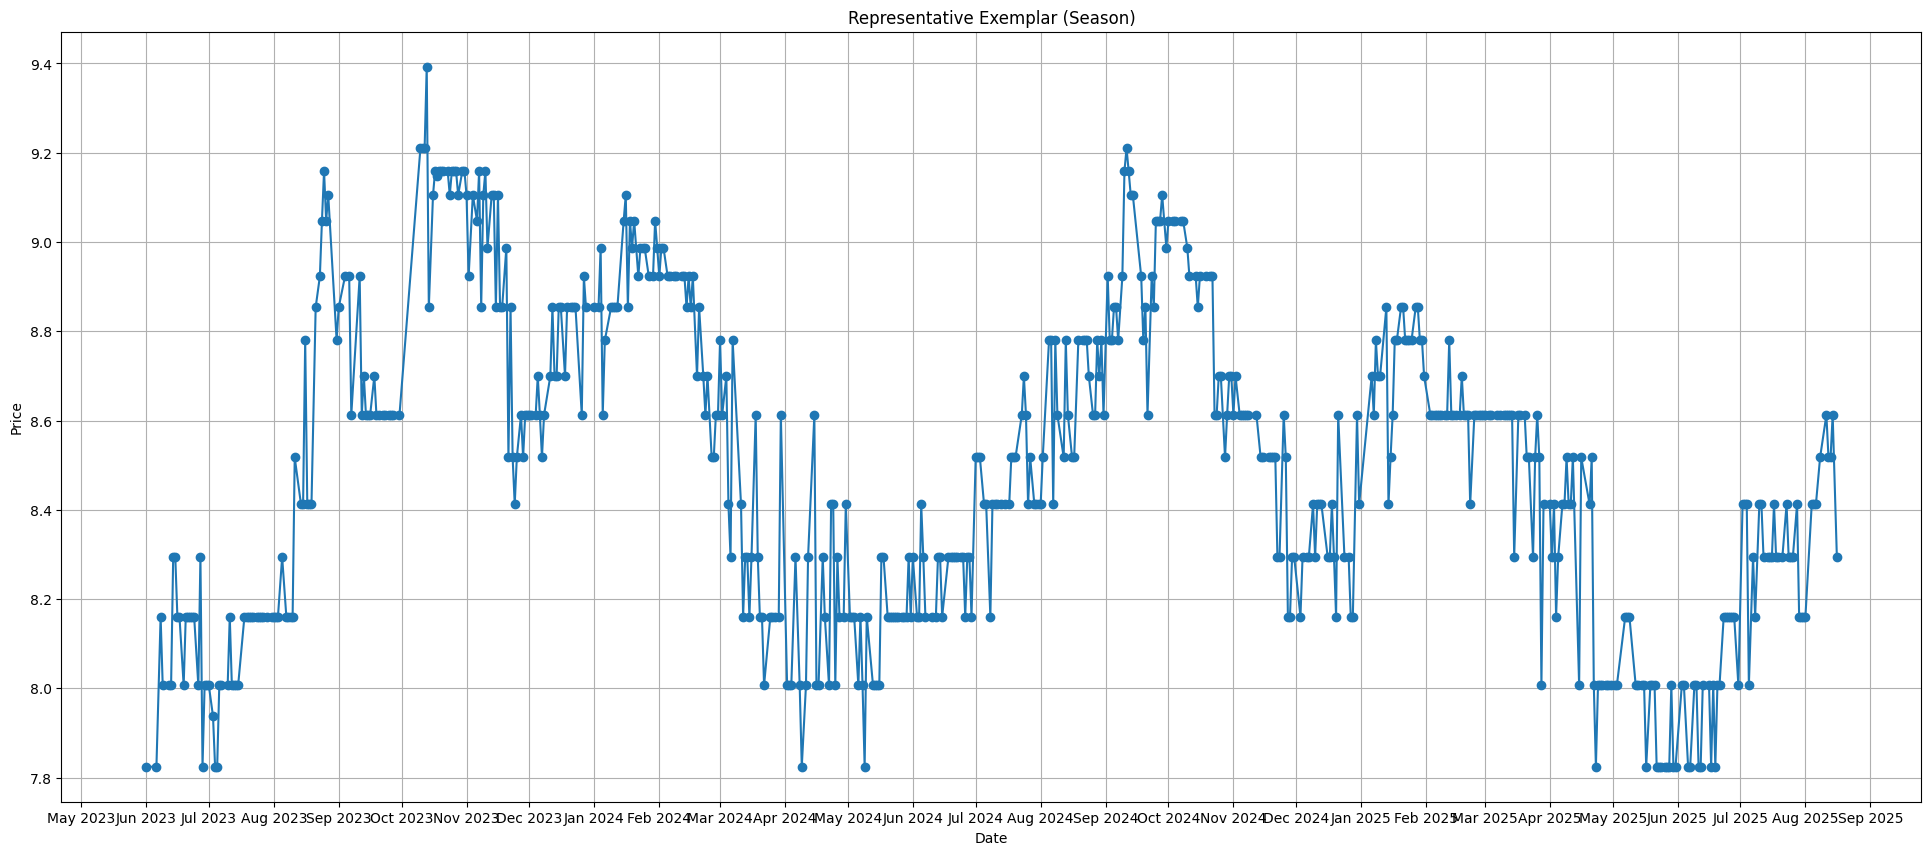

High Volume Product: Drumstick|Drumstick|FAQ
High Volume Market: Perumbavoor


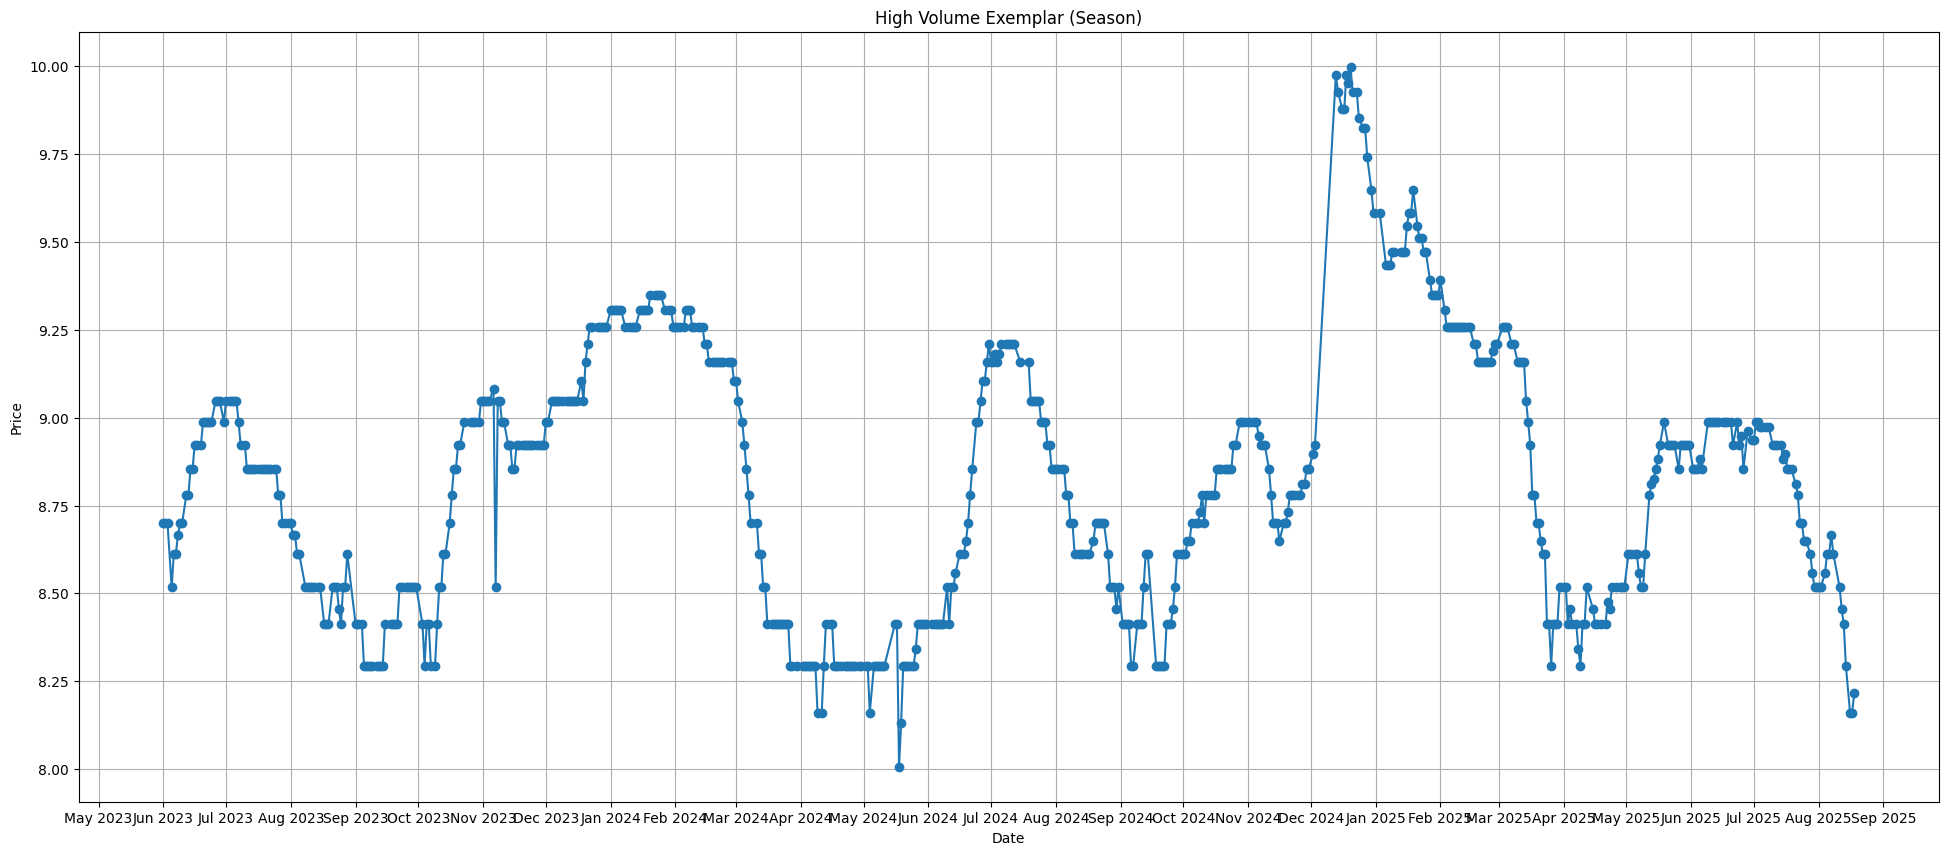

Feature: Season|Market
Different exemplars → plotting both
Representative Product: Ashgourd|Ashgourd|FAQ
Representative Market: Aluva


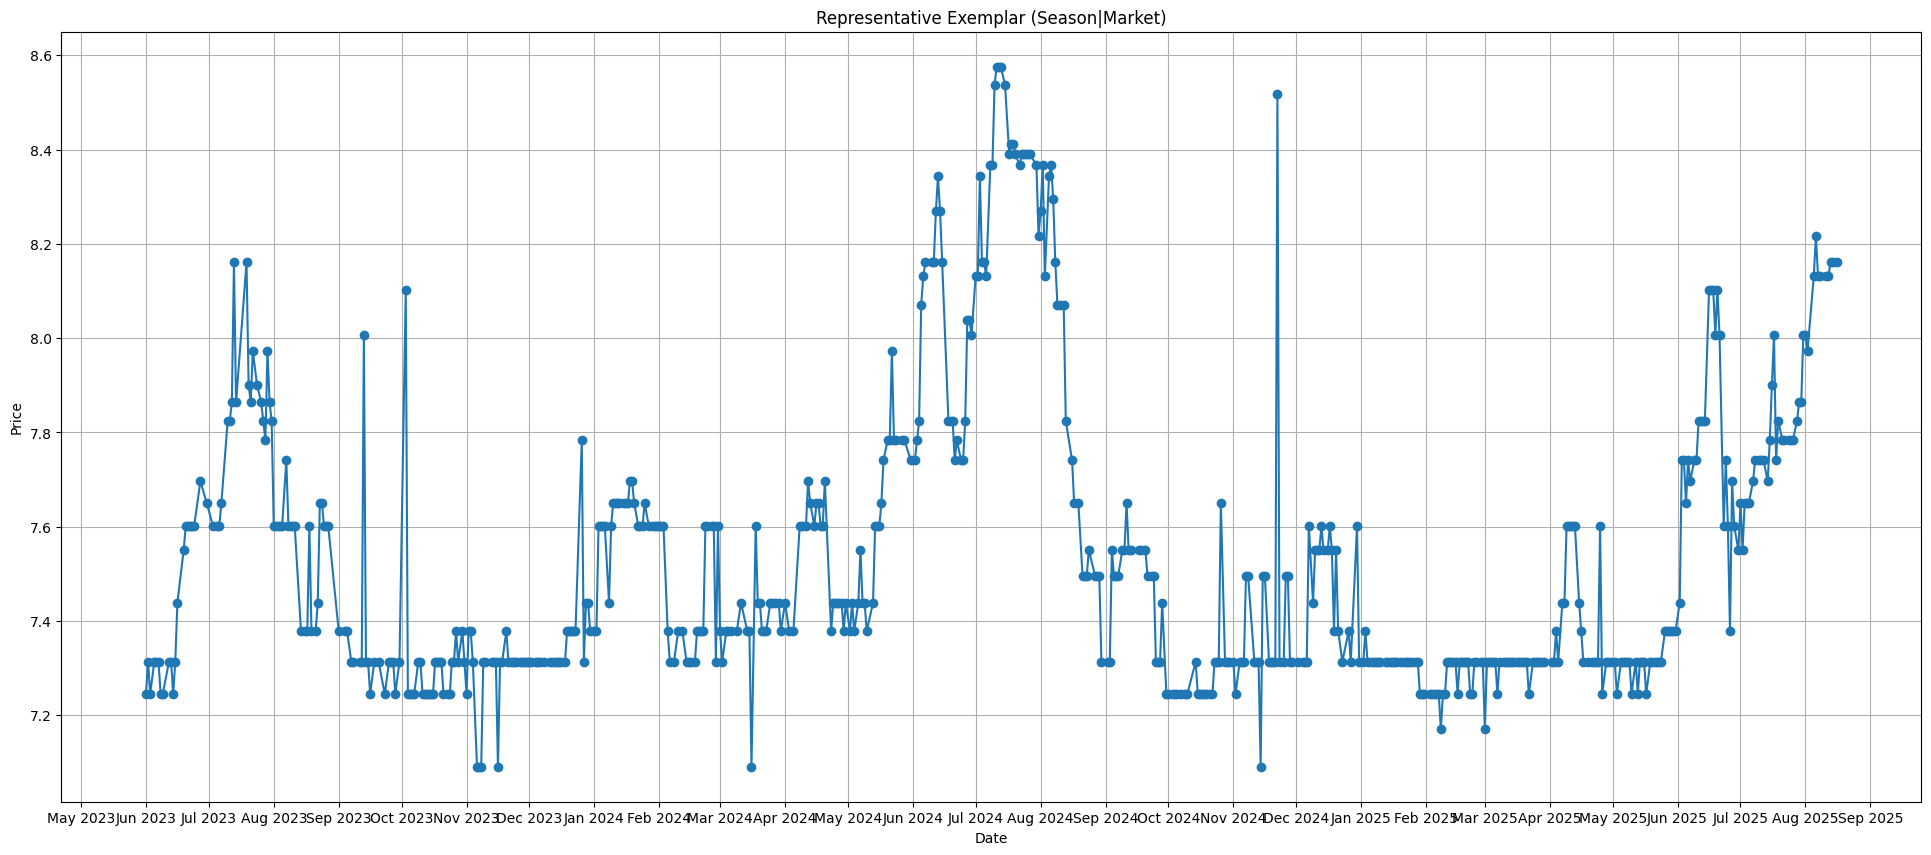

High Volume Product: Bitter gourd|Bitter Gourd|FAQ
High Volume Market: Perumbavoor


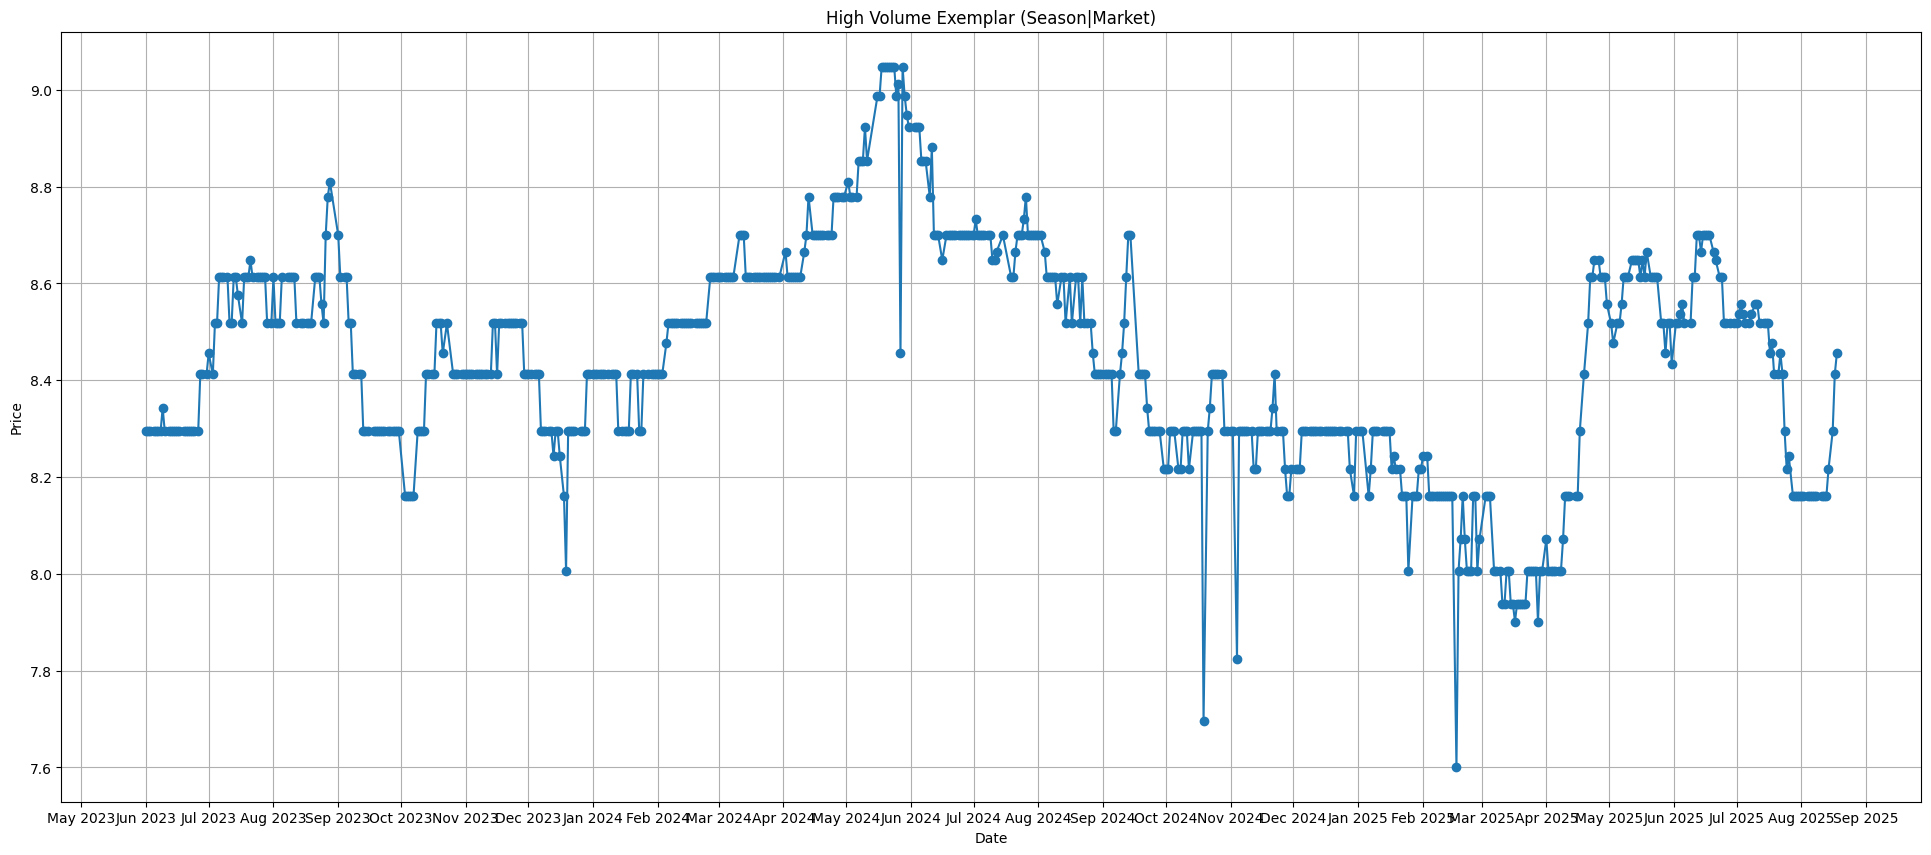

Feature: Season|Market|Year
Different exemplars → plotting both
Representative Product: Amphophalus|Amphophalus|FAQ
Representative Market: Angamaly


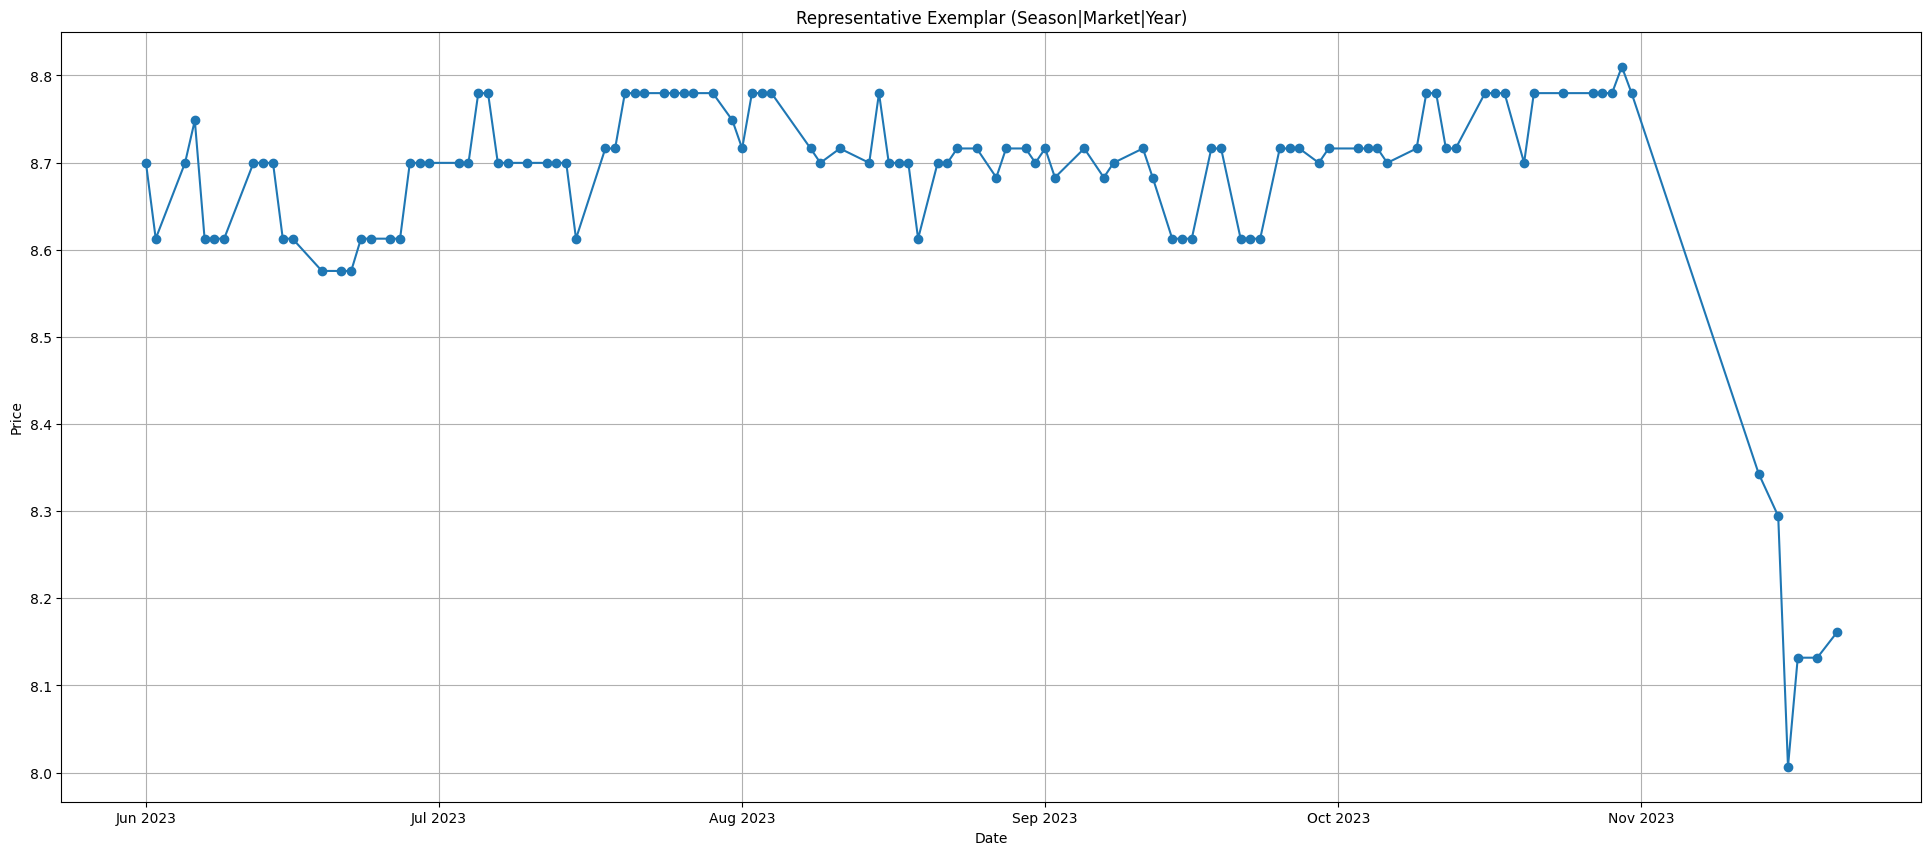

High Volume Product: Banana - Green|Banana - Green|FAQ
High Volume Market: Perumbavoor


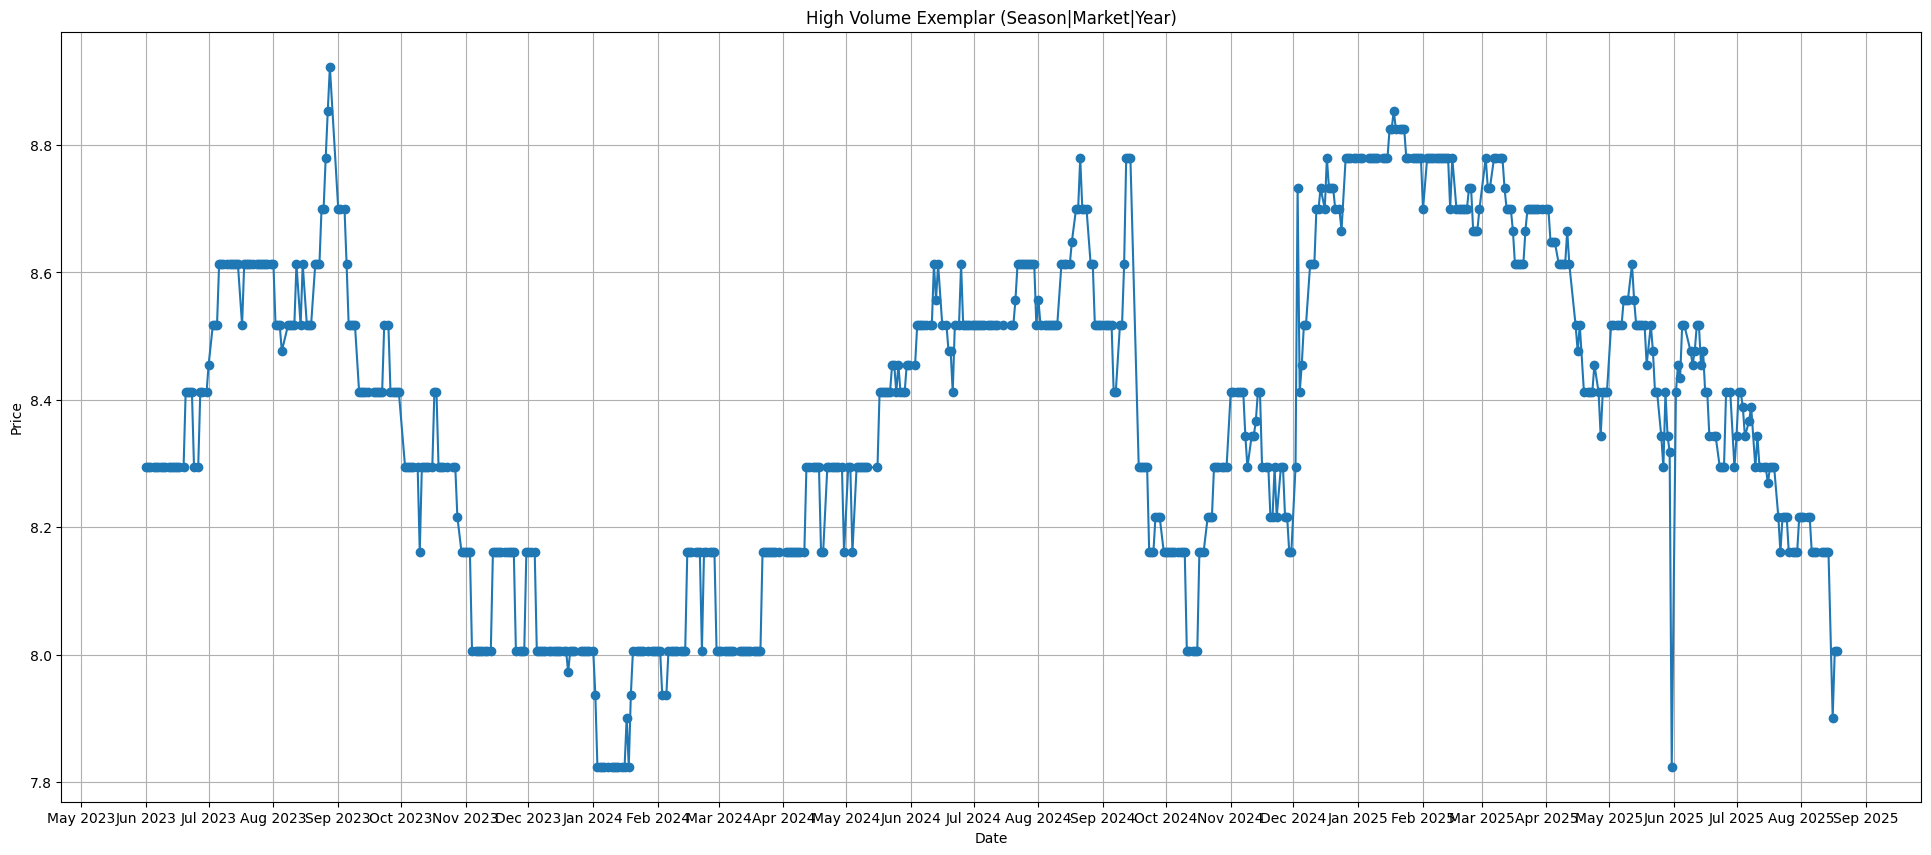

Feature: Season|Year
Different exemplars → plotting both
Representative Product: Leafy Vegetable|Other|FAQ
Representative Market: Thrippunithura


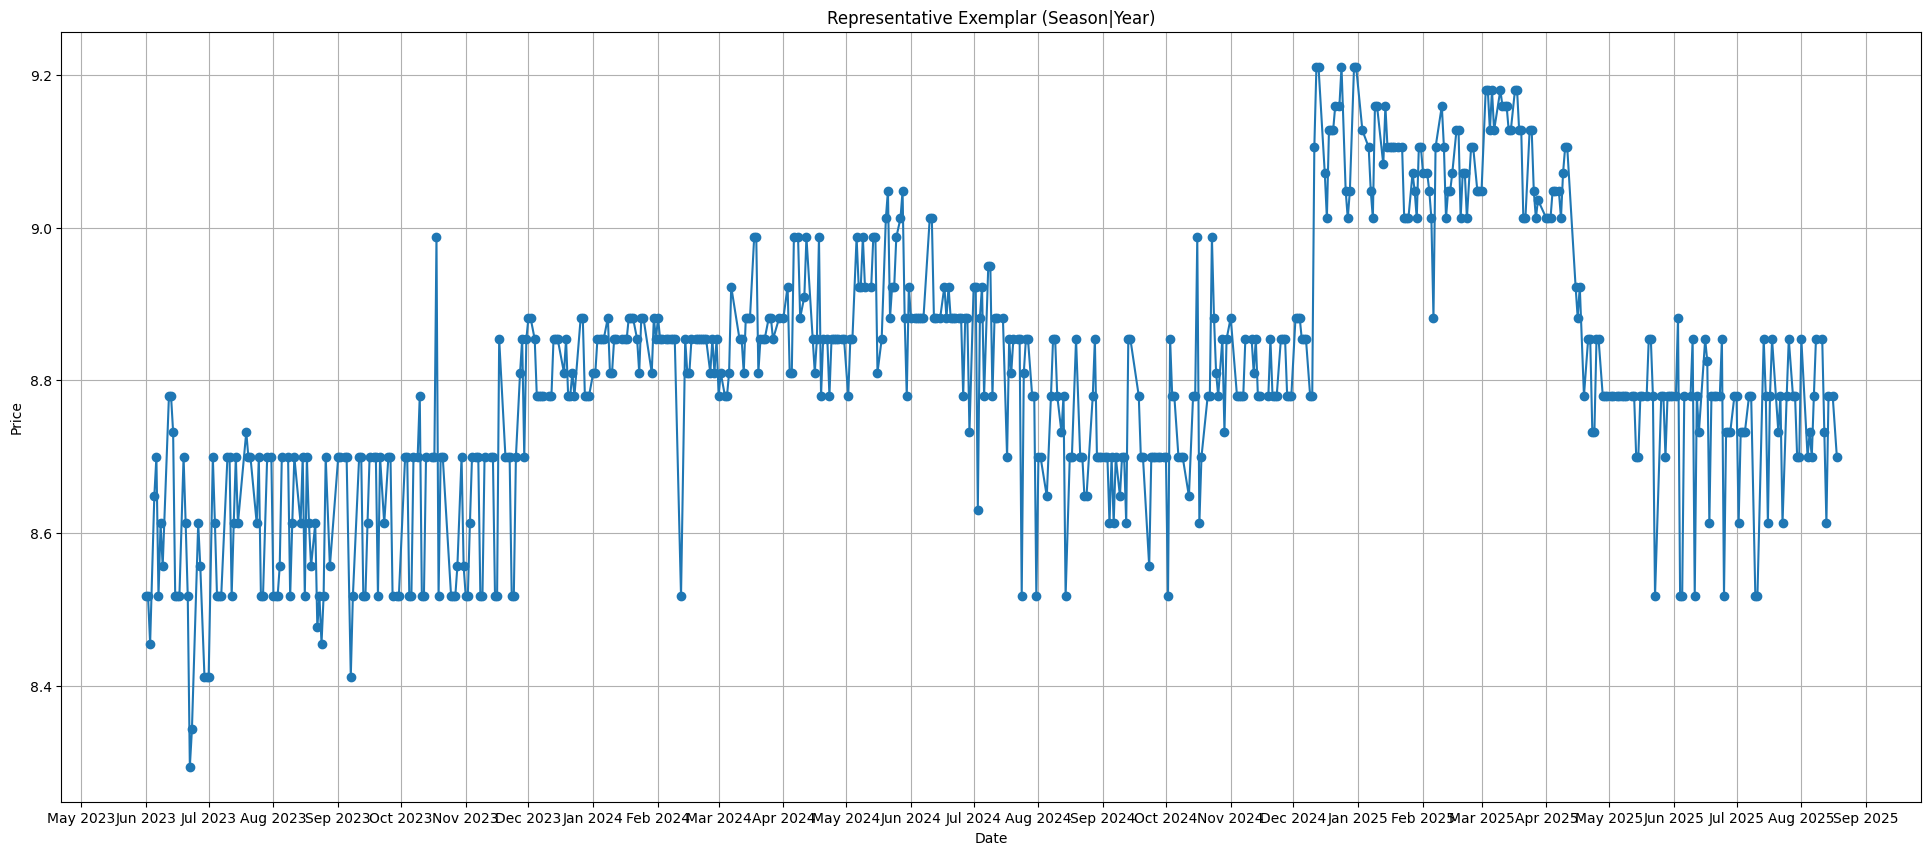

High Volume Product: Arecanut(Betelnut/Supari)|Supari|FAQ
High Volume Market: Perumbavoor


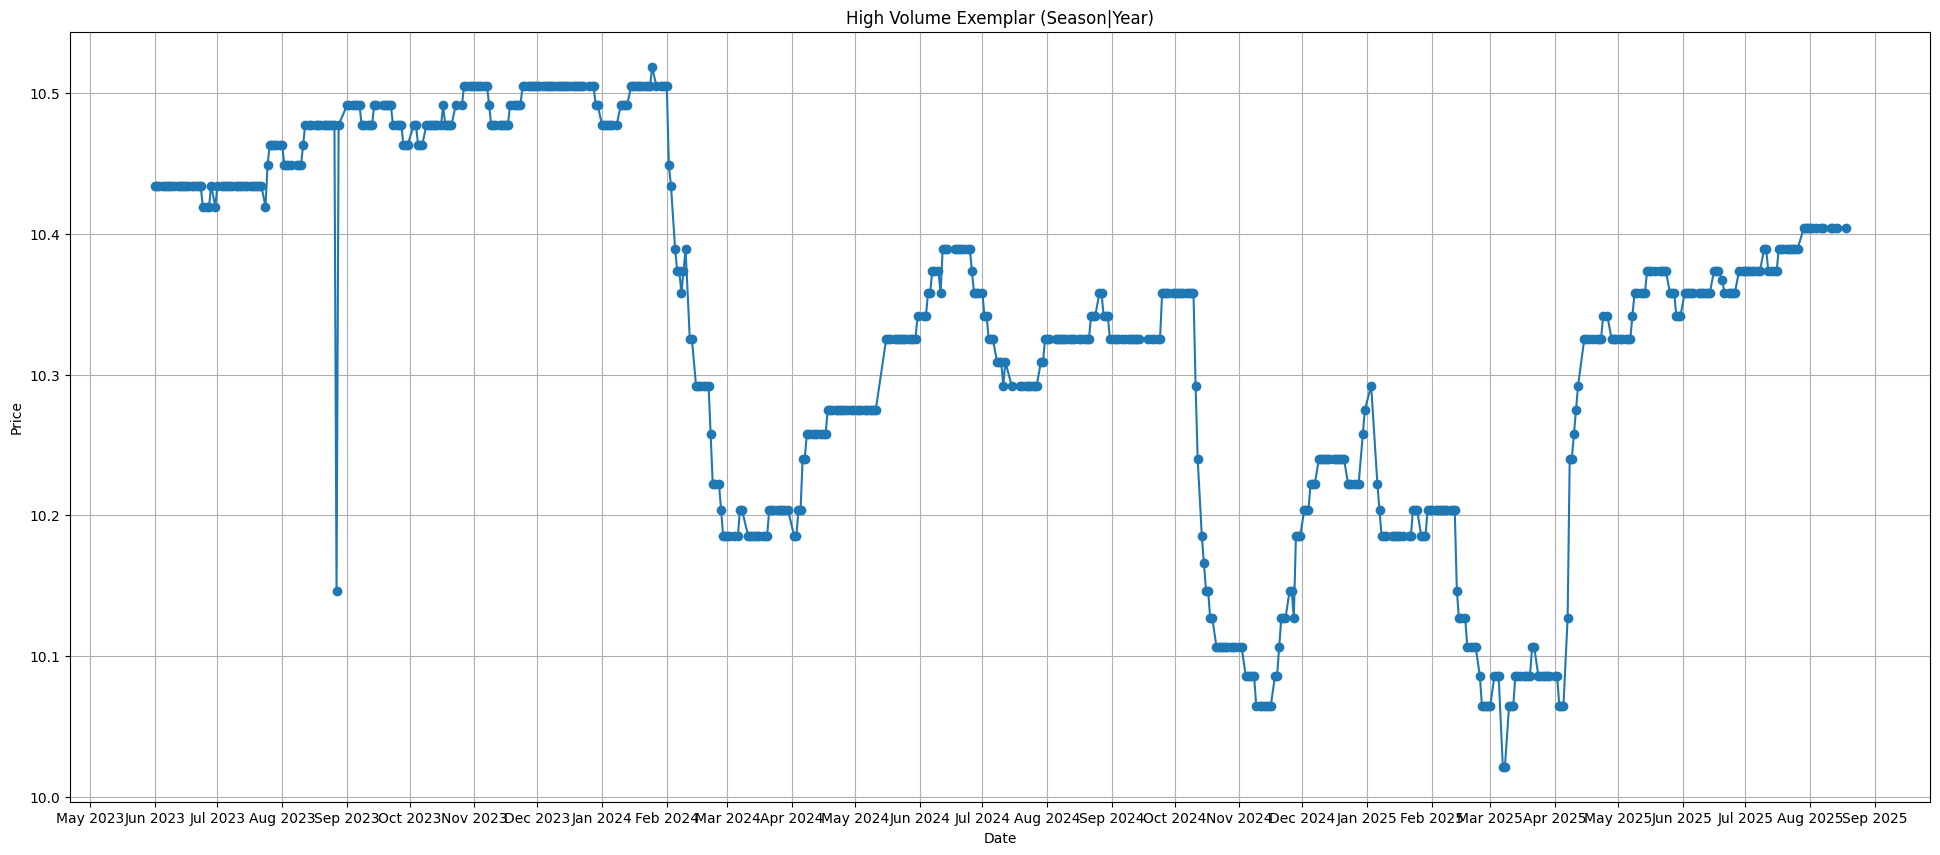

Feature: Year
Representative is the same as High Volume exemplar
Product: Ginger(Dry)|Dry|FAQ
Market: Perumbavoor


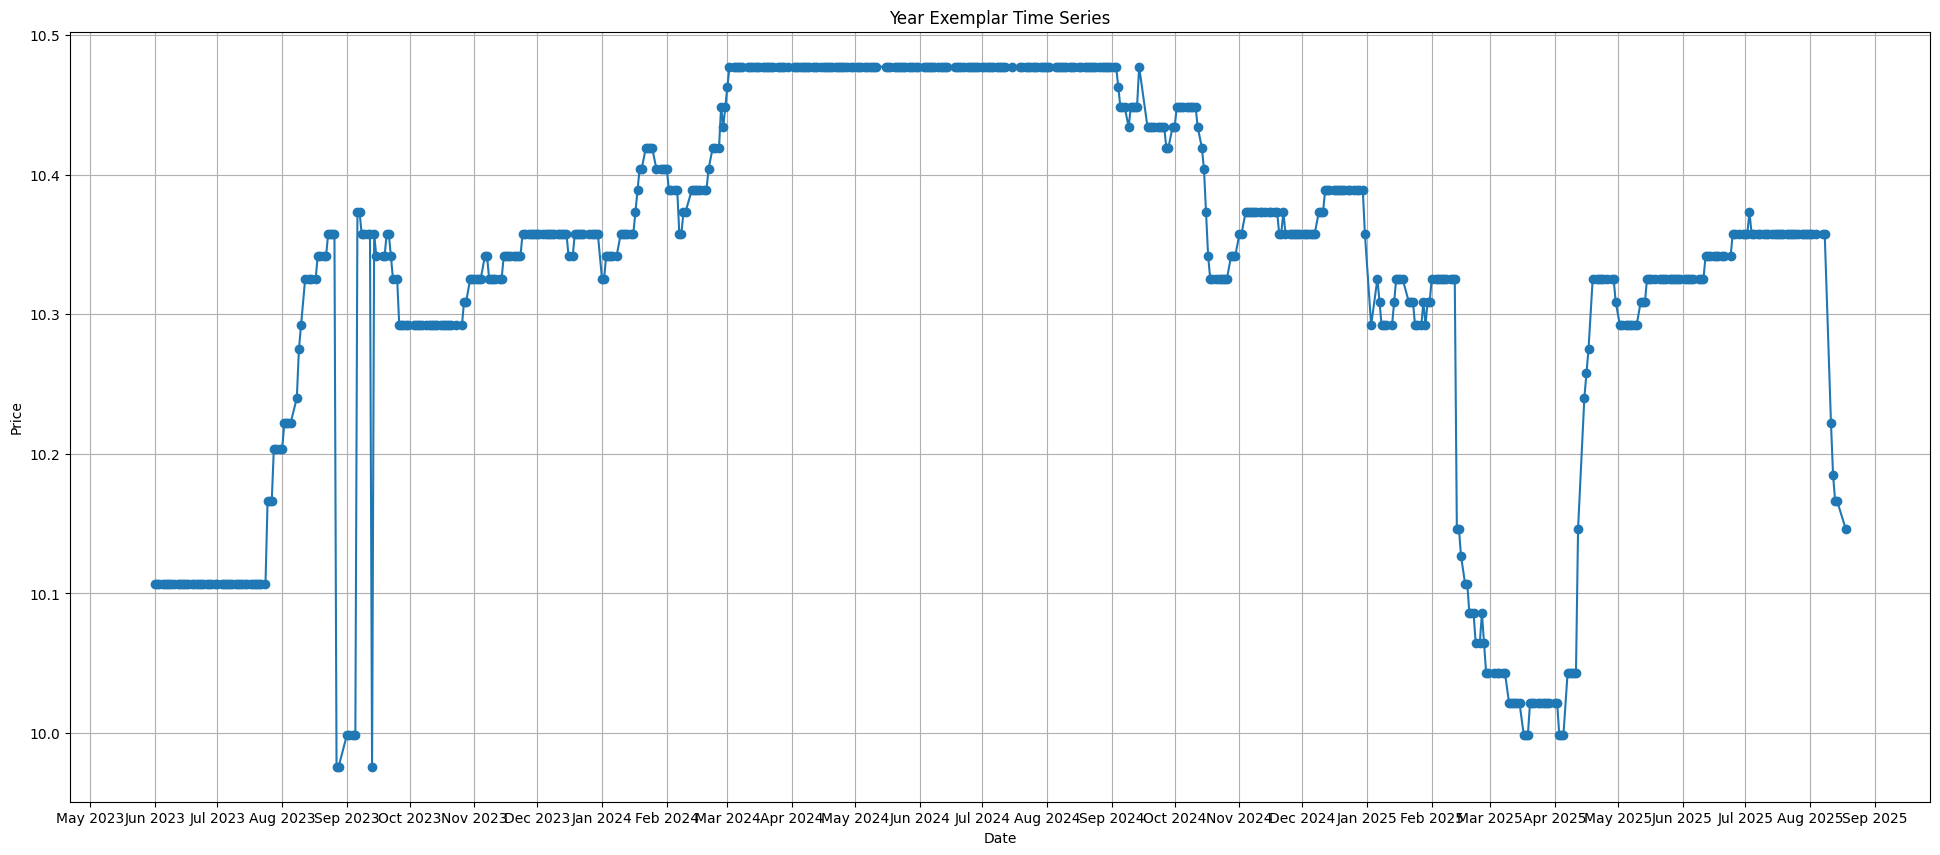

In [2]:
for feature in rep_exemplars.keys():
    if "Season" in feature or "Year" in feature:
        print(f'Feature: {feature}')
        
        df_rep, df_vol = time_series_extractor(df, feature, rep_exemplars, vol_exemplars)
        if df_rep.equals(df_vol):
            print("Representative is the same as High Volume exemplar")
            print(f'Product: {rep_exemplars[feature][0]}')
            print(f'Market: {rep_exemplars[feature][1]}')
            plot_time_series(df_rep["log_Modal_Price"], title=f"{feature} Exemplar Time Series")
        else:
            print("Different exemplars → plotting both")
            print(f'Representative Product: {rep_exemplars[feature][0]}')
            print(f'Representative Market: {rep_exemplars[feature][1]}')
            plot_time_series(df_rep["log_Modal_Price"], title=f"Representative Exemplar ({feature})")
            print(f'High Volume Product: {vol_exemplars[feature][0]}')
            print(f'High Volume Market: {vol_exemplars[feature][1]}')
            plot_time_series(df_vol["log_Modal_Price"], title=f"High Volume Exemplar ({feature})")

## Summary of Log(Modal Price) Time Series

- **Normalization effect:**  
  Applying the log transform smoothed out extreme spikes in modal prices, making trends easier to interpret. Prices now reflect relative (percentage-like) changes rather than absolute jumps, which improves comparability across commodities.

- **Representative vs. High Volume exemplars:**  
  Across all groups, the two exemplar series move in very similar directions. This confirms that both selection methods capture the same underlying market signal, with differences mostly in noise or scale.

- **Trends observed:**  
  Several commodities display clear upward cycles followed by downward corrections, indicating seasonal or yearly influences. In some cases, long-term upward trends are visible, suggesting structural effects such as inflation or demand shifts.

- **Interpretability:**  
  On the log scale, shifts in the y-axis can be interpreted in terms of percentage changes in price. This makes seasonal and growth effects more consistent across commodities with very different price ranges.


In [ ]:
df['Product_Type'].nunique(), df['Market'].nunique()

(124, 28)

In [ ]:
df['Arrival_Date'].min(), df['Arrival_Date'].max()

(Timestamp('2023-06-01 00:00:00'), Timestamp('2025-08-18 00:00:00'))

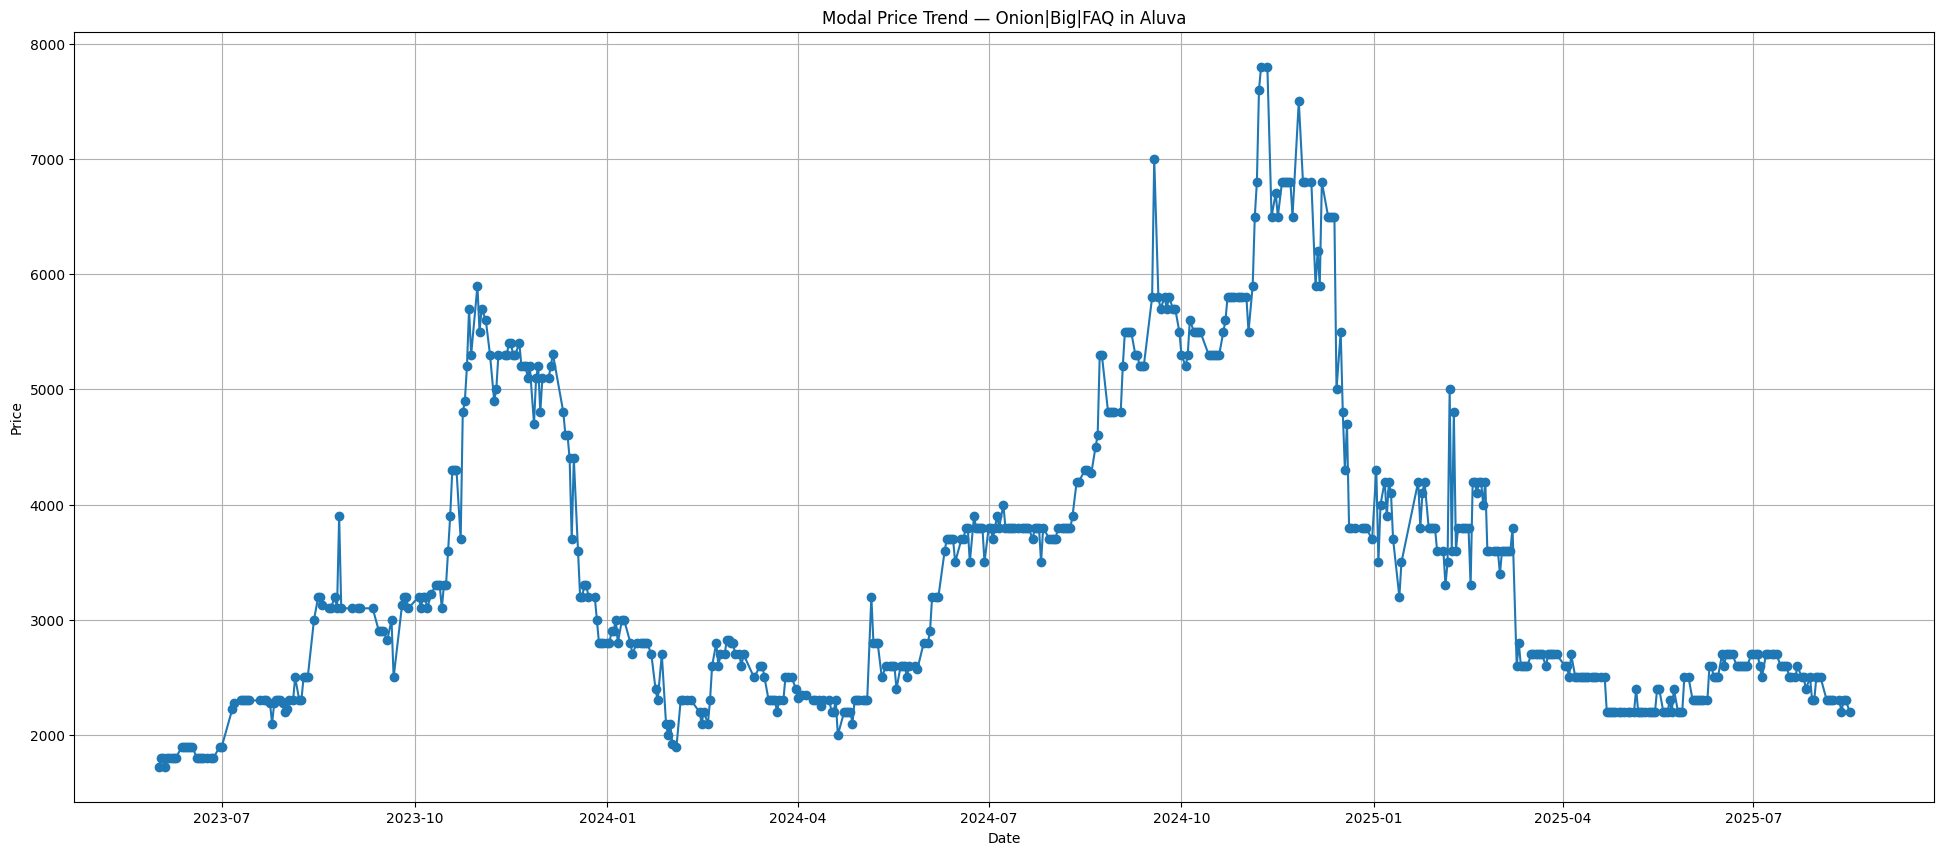

In [ ]:
df_sub = df[(df['Product_Type'] == "Onion|Big|FAQ") & (df['Market'] == "Aluva")]
df_sub = df_sub[['Arrival_Date', 'Modal_Price']].set_index('Arrival_Date').sort_index()

# Plot raw time series
plt.figure(figsize=(24,10))
plt.plot(df_sub['Modal_Price'], marker='o')
plt.title(f'Modal Price Trend — Onion|Big|FAQ in Aluva')
plt.xlabel('Date')
plt.ylabel('Price')
plt.yticks
plt.grid(True)
plt.show()

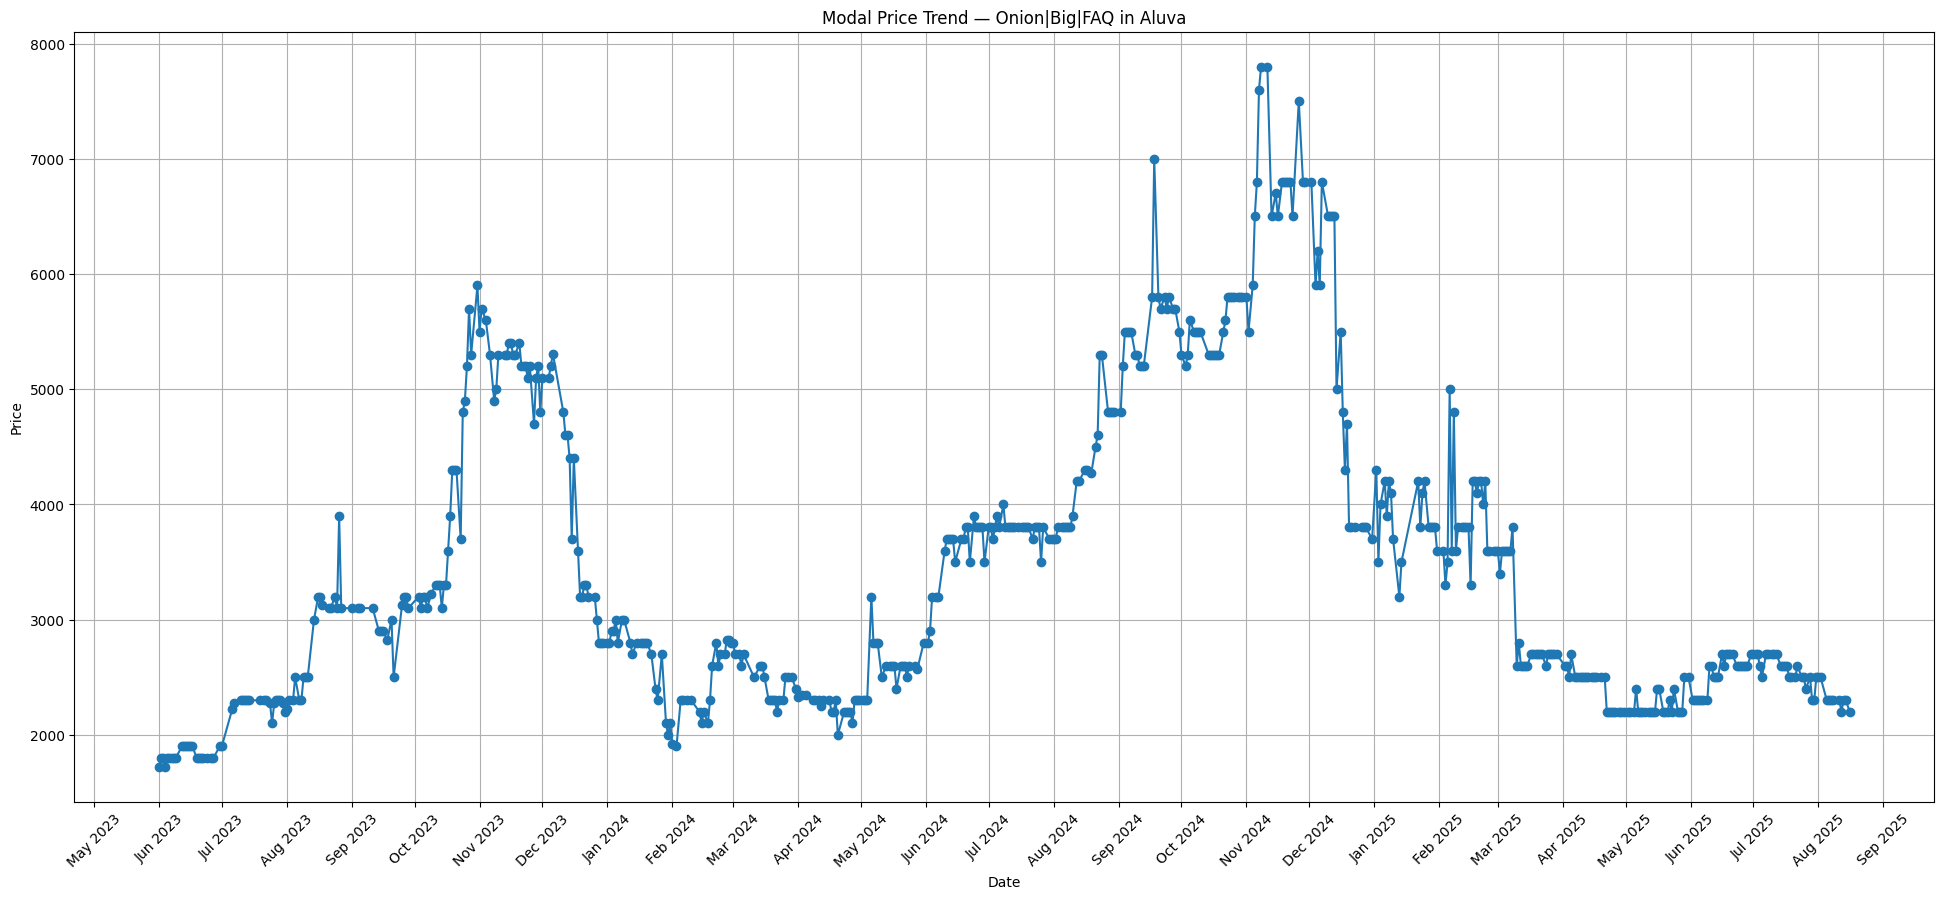

In [ ]:
import matplotlib.dates as mdates

df_sub = df[(df['Product_Type'] == "Onion|Big|FAQ") & (df['Market'] == "Aluva")]
df_sub = df_sub[['Arrival_Date', 'Modal_Price']].set_index('Arrival_Date').sort_index()

# Plot raw time series
plt.figure(figsize=(24,10))
plt.plot(df_sub.index, df_sub['Modal_Pricea'], marker='o')

# Title & labels
plt.title('Modal Price Trend — Onion|Big|FAQ in Aluva')
plt.xlabel('Date')
plt.ylabel('Price')

# Show all months on x-axis
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())       # tick every month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # format: "Jan 2025"

plt.xticks(rotation=45)  # rotate for readability
plt.grid(True)
plt.show()

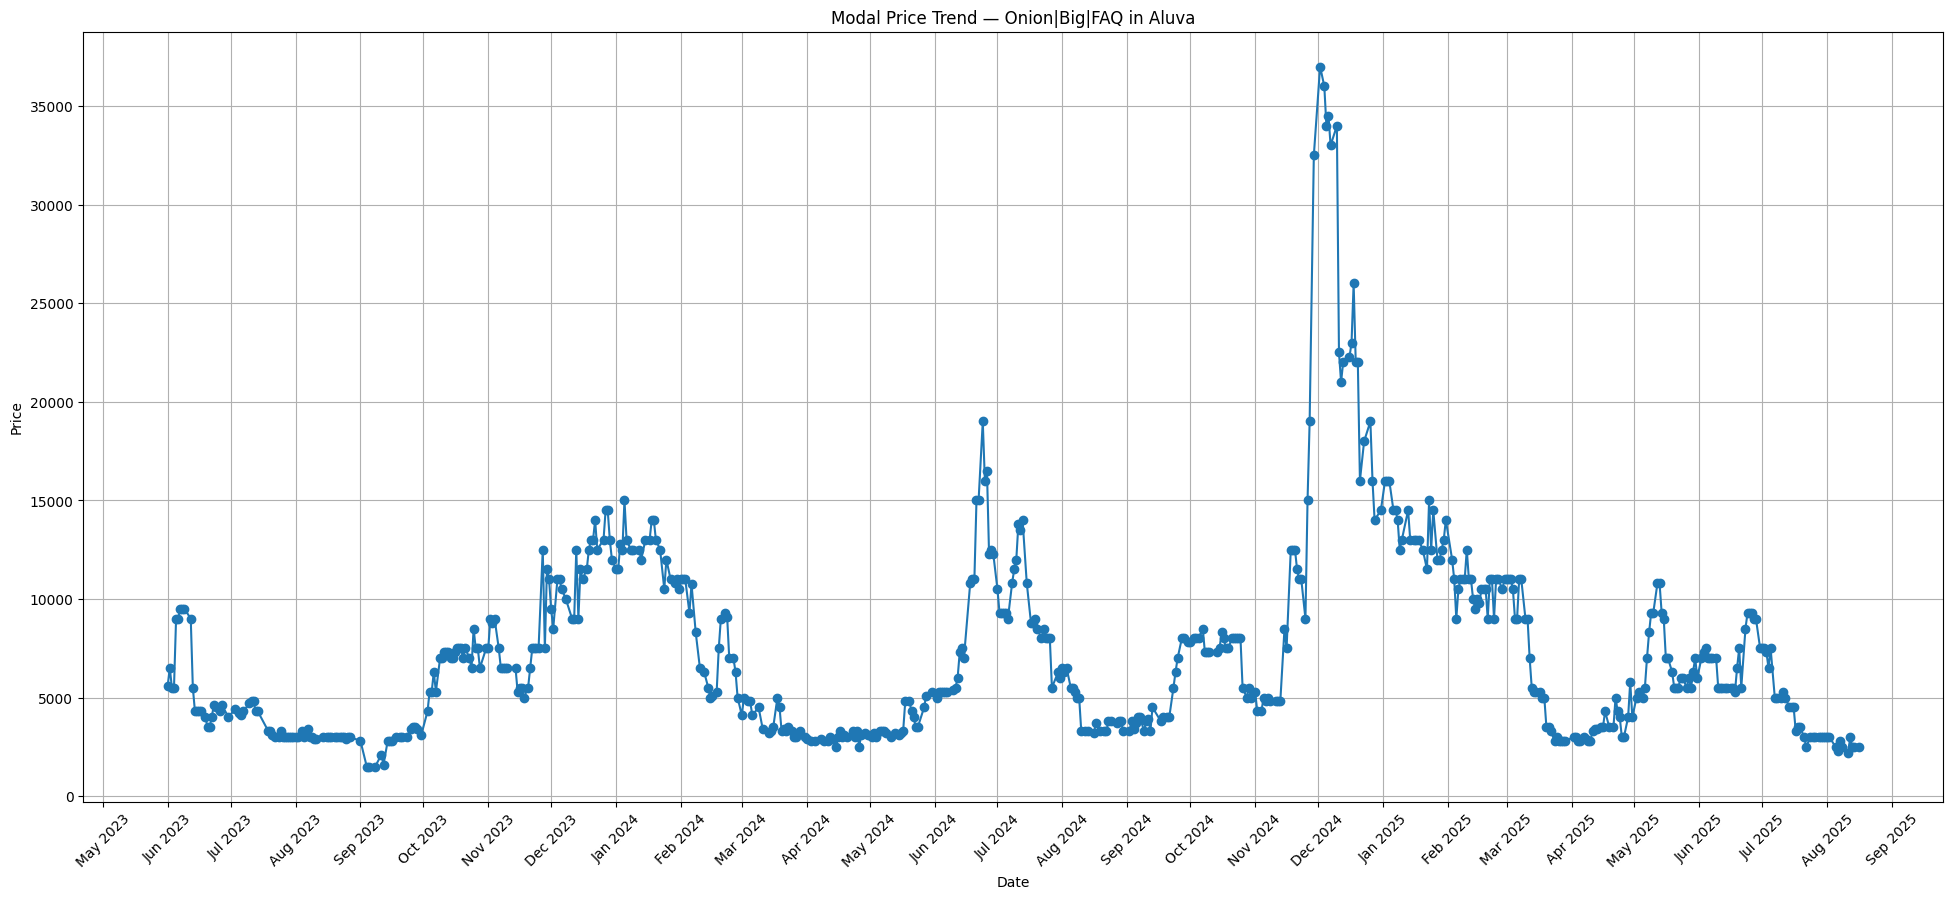

In [ ]:
df_sub = df[(df['Product_Type'] == "Drumstick|Drumstick|FAQ") & (df['Market'] == "Aluva")]
df_sub = df_sub[['Arrival_Date', 'Modal_Price']].set_index('Arrival_Date').sort_index()

# Plot raw time series
plt.figure(figsize=(24,10))
plt.plot(df_sub.index, df_sub['Modal_Price'], marker='o')

# Title & labels
plt.title('Modal Price Trend — Drumstick|Drumstick|FAQ in Aluva')
plt.xlabel('Date')
plt.ylabel('Price')

# Show all months on x-axis
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())       # tick every month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # format: "Jan 2025"

plt.xticks(rotation=45)  # rotate for readability
plt.grid(True)
plt.show()

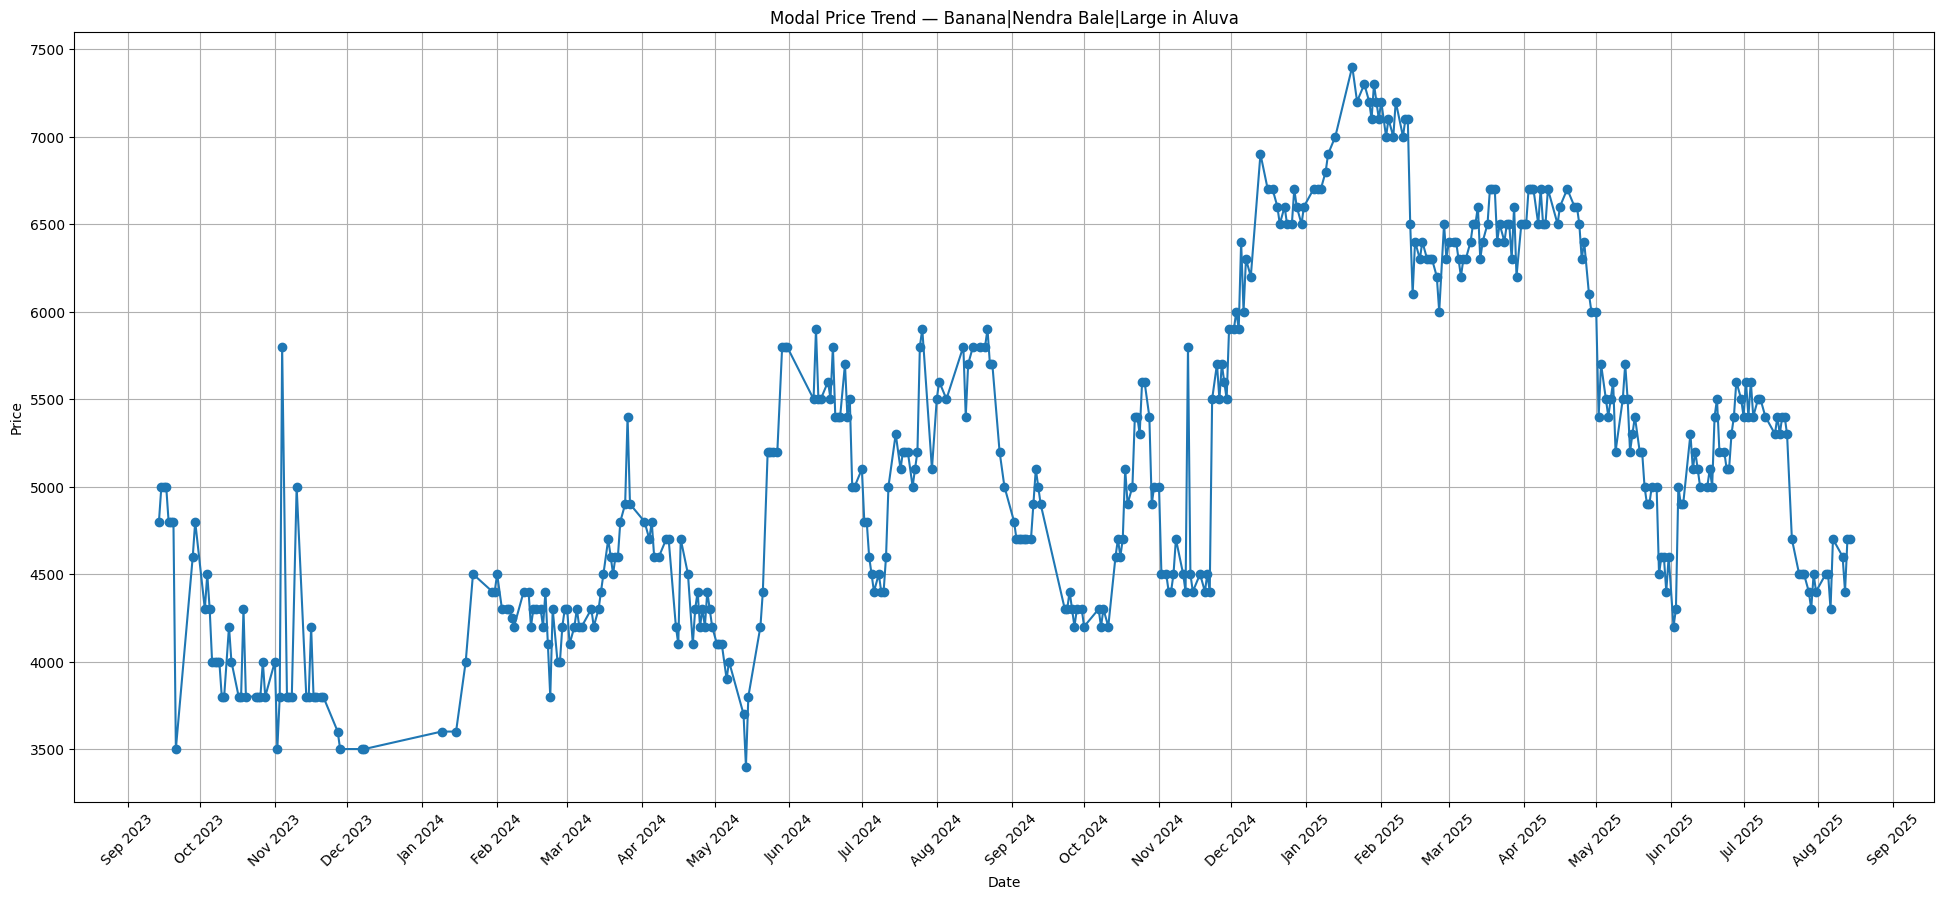

In [ ]:
df_sub = df[(df['Product_Type'] == "Banana|Nendra Bale|Large") & (df['Market'] == "Ernakulam")]
df_sub = df_sub[['Arrival_Date', 'Modal_Price']].set_index('Arrival_Date').sort_index()

# Plot raw time series
plt.figure(figsize=(24,10))
plt.plot(df_sub.index, df_sub['Modal_Price'], marker='o')

# Title & labels
plt.title('Modal Price Trend — Banana|Nendra Bale|Large in Aluva')
plt.xlabel('Date')
plt.ylabel('Price')

# Show all months on x-axis
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())       # tick every month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # format: "Jan 2025"

plt.xticks(rotation=45)  # rotate for readability
plt.grid(True)
plt.show()

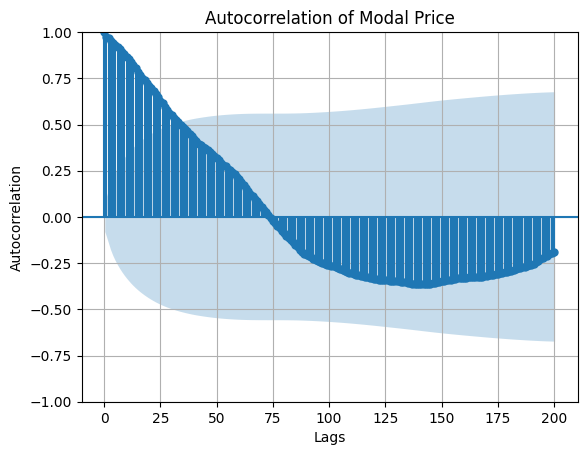

In [ ]:

fig = plot_acf(df_sub['Modal_Price'], lags=200)
plt.title('Autocorrelation of Modal Price')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

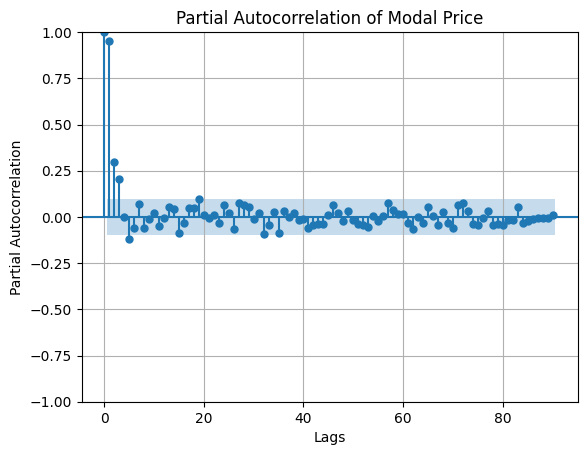

In [ ]:
fig = plot_pacf(df_sub['Modal_Price'], lags=90)
plt.title('Partial Autocorrelation of Modal Price')
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')
plt.grid(True)
plt.show()

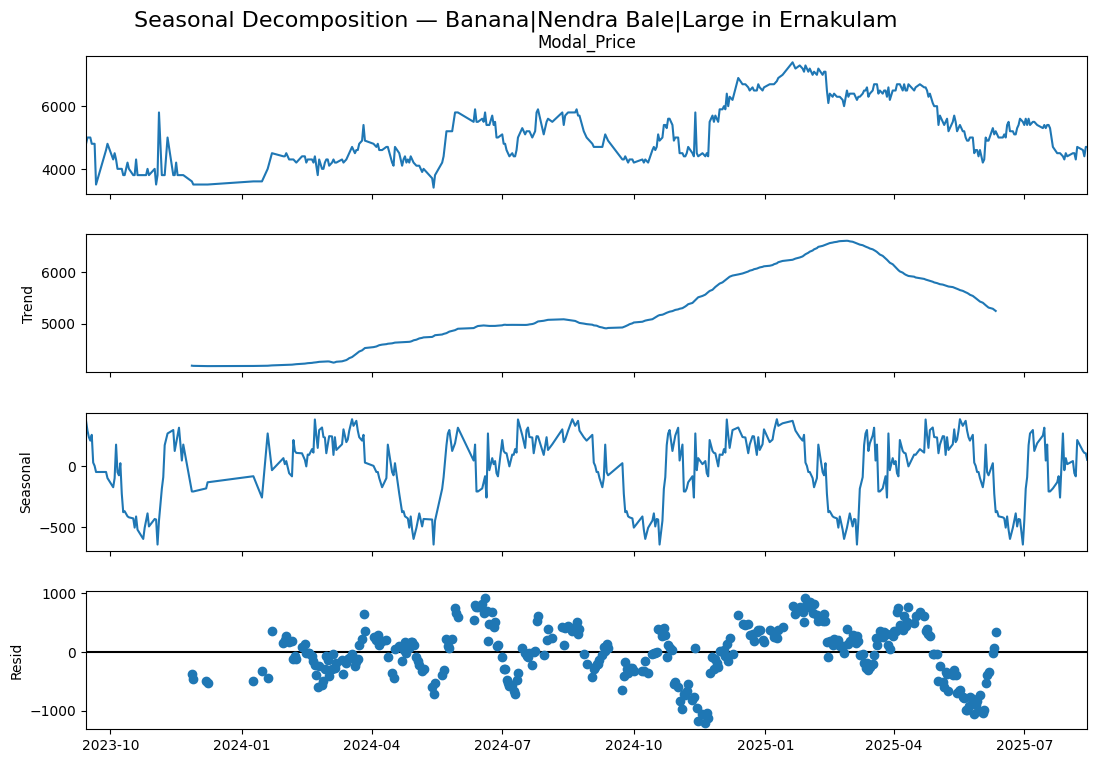

In [ ]:
result = seasonal_decompose(df_sub['Modal_Price'], model='additive', period=90)
fig = result.plot()
fig.set_size_inches(12, 8)
plt.suptitle(f'Seasonal Decomposition — Banana|Nendra Bale|Large in Ernakulam', fontsize=16)
plt.show()